# PROBLEM: MENTAL STRESS PREDICTION

Mental stress is a common problem in people especially in the students . It can cause various negative effects on an individual's physical and mental health, leading to anxiety, depression,sucide thoughts and other health issues.

Therefore, it is important to detect mental stress at an early stage and take necessary measures to be able don't affected by mental stress in the college student.We had collected data from Our College students.

We should classify into 3 levels in the mental stress by using PSS Stress Scale Factor.

For the data we took from the students by asking some Psycological questions  and taking responses from them and then classifing into 3-classes as above we said PSS Stress Scale. (We prepared a google form by this questions the responses are recorded similar to survey data). Around 194 data response we had collected in our college students.

Then we should apply the Machine Learning on this data to predict the Mental Stress Level in the Students.

These are the Stress Levels We categoraize into 3-classes are 1)High 2)Medium 3)Low

The following Psycological question were asked the the students:

 1)  NAME  
2) GENDER                                                                        
 3)   AGE                                                                           
 4)   CLASS                                                                         
 5) BRANCH                                                                         
 6) Have you ever had difficulty in concentrating or appeared to have a blank mind ?  
 7) When do you feel more stressed ?             
 8) Do you feel anxiety with your works ?                                 
 9) Do you feel anxiety with your social life ?                           
 10) Do you feel anxiety with your personal problems ?                      
 11) Do you find diffculty to pay attention in class ?                      
 12) How much time do you spend for studying in a day ?                    
 13) Do you struggle to acheive your passion or goals ?                     
 14) Do you struggle to learn new things ?                               
 15) What are the usual Psychological or Emotional effects of stress you've noticed within yourself ?

 16) What are your personal methods to relieve stress ?                  
 17) What are the usual Cognitive effects of stress you've noticed by
 yourself?

 18) Are you satisfied with the quality of your work ?       

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving ML stress data 2.csv to ML stress data 2.csv


### Importing the dataset

In [3]:
df=pd.read_csv("ML stress data 2.csv")

In [4]:
df

,NAME,GENDER,AGE,CLASS,BRANCH,Have you ever had difficulty in concentrating or appeared to have a blank mind ?,When do you feel more stressed ?,Do you feel anxiety with your works ?,Do you feel anxiety with your social life ?,Do you feel anxiety with your personal problems ?,Do you find diffculty to pay attention in class ?,How much time do you spend for studying in a day ?,Do you struggle to acheive your passion or goals ?,Do you struggle to learn new things ?,What are the usual Psychological or Emotional effects of stress you've noticed within yourself ?,What are your personal methods to relieve stress ?,What are the usual Cognitive effects of stress you've noticed by yourself ?,Are you satisfied with the quality of your work ?
0,Bhargav,MALE,22,4th,MECH,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,NEUTRAL,FEAR,SOCIAL MEDIA,CONFUSION,AGREE
1,Ch. Vineeth,MALE,20,4th,MECH,AGREE,NIGHT,NEUTRAL,AGREE,AGREE,NEUTRAL,0-1 HOURS,NEUTRAL,NEUTRAL,ANGER,SOCIAL MEDIA,CONFUSION,STRONGLY AGREE
2,MV SUBASH,MALE,21,4th,MECH,AGREE,EVENING,NEUTRAL,AGREE,NEUTRAL,NEUTRAL,1-2 HOURS,STRONGLY AGREE,AGREE,LONELINESS,SOCIAL MEDIA,LIMITED ATTENTION SPAN,AGREE
3,Prakash,MALE,22,4th,MECH,AGREE,EVENING,AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL,0-1 HOURS,AGREE,AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,AGREE
4,Manjunath,MALE,20,4th,MECH,AGREE,EVENING,STRONGLY AGREE,AGREE,AGREE,DISAGREE,4+ HOURS,STRONGLY AGREE,STRONGLY AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,STRONGLY AGREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,sudhan,MALE,21,2nd,CSE,STRONGLY AGREE,EVENING,AGREE,AGREE,NEUTRAL,NEUTRAL,2-3 HOURS,DISAGREE,STRONGLY AGREE,TIREDNESS,GAMES,DIFFICULTY CONCENTRATING,DISAGREE
190,prakesh,MALE,23,3rd,MECH,AGREE,EVENING,NEUTRAL,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,0-1 HOURS,NEUTRAL,STRONGLY AGREE,ANGER,SLEEPING,LIMITED ATTENTION SPAN,NEUTRAL
191,Naveen kumar,MALE,23,2nd,EEE,STRONGLY DISAGREE,EARLY MORNING,NEUTRAL,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,4+ HOURS,STRONGLY DISAGREE,STRONGLY DISAGREE,LONELINESS,SOCIAL MEDIA,MEMORY PROBLEMS,STRONGLY DISAGREE
192,Katija,FEMALE,21,4th,MECH,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,STRONGLY AGREE,TIREDNESS,EATING,MEMORY PROBLEMS,STRONGLY AGREE


## Basic checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 18 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   NAME                                                                                              194 non-null    object
 1   GENDER                                                                                            194 non-null    object
 2   AGE                                                                                               194 non-null    int64 
 3   CLASS                                                                                             192 non-null    object
 4   BRANCH                                                                                            193 non-null    object
 5   Have you

#### By above info shows that some basic features about students & Some Questions is there about Mental Stress

In [6]:
df.describe()

,AGE
count,194.000000
mean,20.731959
std,1.067809
min,18.000000
25%,20.000000
50%,21.000000
75%,21.750000
max,24.000000


#### There only one numerical column is age with mean of 20

In [7]:
df.describe(include="O")

,NAME,GENDER,CLASS,BRANCH,Have you ever had difficulty in concentrating or appeared to have a blank mind ?,When do you feel more stressed ?,Do you feel anxiety with your works ?,Do you feel anxiety with your social life ?,Do you feel anxiety with your personal problems ?,Do you find diffculty to pay attention in class ?,How much time do you spend for studying in a day ?,Do you struggle to acheive your passion or goals ?,Do you struggle to learn new things ?,What are the usual Psychological or Emotional effects of stress you've noticed within yourself ?,What are your personal methods to relieve stress ?,What are the usual Cognitive effects of stress you've noticed by yourself ?,Are you satisfied with the quality of your work ?
count,194,194,192,193,194,194,194,194,194,194,194,194,194,192,192,194,194
unique,185,2,4,7,5,4,5,5,5,5,5,5,5,5,4,4,5
top,Srinu,MALE,4th,MECH,STRONGLY AGREE,EVENING,AGREE,AGREE,AGREE,AGREE,0-1 HOURS,STRONGLY AGREE,STRONGLY AGREE,TIREDNESS,SOCIAL MEDIA,CONFUSION,STRONGLY AGREE
freq,2,130,80,69,78,83,60,61,64,64,65,62,58,53,64,59,68


#### The describe feature shows that most repeating terms in every feature & how many unique also in tha data

In [8]:
data = df.copy()

#### Dropping the data features like Name, Class, Branch there are no need of necessary.

In [9]:
data.drop("NAME",axis=1,inplace=True)
data.drop("CLASS",axis=1,inplace=True)
data.drop("BRANCH",axis=1,inplace=True)

In [10]:
data

,GENDER,AGE,Have you ever had difficulty in concentrating or appeared to have a blank mind ?,When do you feel more stressed ?,Do you feel anxiety with your works ?,Do you feel anxiety with your social life ?,Do you feel anxiety with your personal problems ?,Do you find diffculty to pay attention in class ?,How much time do you spend for studying in a day ?,Do you struggle to acheive your passion or goals ?,Do you struggle to learn new things ?,What are the usual Psychological or Emotional effects of stress you've noticed within yourself ?,What are your personal methods to relieve stress ?,What are the usual Cognitive effects of stress you've noticed by yourself ?,Are you satisfied with the quality of your work ?
0,MALE,22,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,NEUTRAL,FEAR,SOCIAL MEDIA,CONFUSION,AGREE
1,MALE,20,AGREE,NIGHT,NEUTRAL,AGREE,AGREE,NEUTRAL,0-1 HOURS,NEUTRAL,NEUTRAL,ANGER,SOCIAL MEDIA,CONFUSION,STRONGLY AGREE
2,MALE,21,AGREE,EVENING,NEUTRAL,AGREE,NEUTRAL,NEUTRAL,1-2 HOURS,STRONGLY AGREE,AGREE,LONELINESS,SOCIAL MEDIA,LIMITED ATTENTION SPAN,AGREE
3,MALE,22,AGREE,EVENING,AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL,0-1 HOURS,AGREE,AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,AGREE
4,MALE,20,AGREE,EVENING,STRONGLY AGREE,AGREE,AGREE,DISAGREE,4+ HOURS,STRONGLY AGREE,STRONGLY AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,STRONGLY AGREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,MALE,21,STRONGLY AGREE,EVENING,AGREE,AGREE,NEUTRAL,NEUTRAL,2-3 HOURS,DISAGREE,STRONGLY AGREE,TIREDNESS,GAMES,DIFFICULTY CONCENTRATING,DISAGREE
190,MALE,23,AGREE,EVENING,NEUTRAL,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,0-1 HOURS,NEUTRAL,STRONGLY AGREE,ANGER,SLEEPING,LIMITED ATTENTION SPAN,NEUTRAL
191,MALE,23,STRONGLY DISAGREE,EARLY MORNING,NEUTRAL,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,4+ HOURS,STRONGLY DISAGREE,STRONGLY DISAGREE,LONELINESS,SOCIAL MEDIA,MEMORY PROBLEMS,STRONGLY DISAGREE
192,FEMALE,21,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,STRONGLY AGREE,TIREDNESS,EATING,MEMORY PROBLEMS,STRONGLY AGREE


#### Renaming the features columns to work with data is understanding & reliable

In [11]:
data.rename(columns={"Have you ever had difficulty in concentrating or appeared to have a blank mind ?": "Blank_Mind"},inplace=True)
data.rename(columns={"When do you feel more stressed ?": "Times_of_Day"},inplace=True)
data.rename(columns={"Do you feel anxiety with your works ?": "Anxiety_Works"},inplace=True)
data.rename(columns={"Do you feel anxiety with your social life ?": "Anxiety_SocialLife"},inplace=True)
data.rename(columns={"Do you feel anxiety with your personal problems ?": "Anxiety_Personal"},inplace=True)
data.rename(columns={"Do you find diffculty to pay attention in class ?": "Attention_Class"},inplace=True)
data.rename(columns={"How much time do you spend for studying in a day ?": "Time"},inplace=True)
data.rename(columns={"Do you struggle to acheive your passion or goals ?": "Struggle_Goals"},inplace=True)
data.rename(columns={"Do you struggle to learn new things ?": "Struggle_Newthings"},inplace=True)
data.rename(columns={"What are the usual Psychological or Emotional effects of stress you've noticed within yourself ?": "Psychological_Effects"},inplace=True)
data.rename(columns={"What are your personal methods to relieve stress ?": "Relieve_Stress"},inplace=True)
data.rename(columns={"What are the usual Cognitive effects of stress you've noticed by yourself ?": "Cognitive_Effects"},inplace=True)
data.rename(columns={"Are you satisfied with the quality of your work ?": "Work_Satisfaction"},inplace=True)


In [12]:
data

,GENDER,AGE,Blank_Mind,Times_of_Day,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Time,Struggle_Goals,Struggle_Newthings,Psychological_Effects,Relieve_Stress,Cognitive_Effects,Work_Satisfaction
0,MALE,22,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,NEUTRAL,FEAR,SOCIAL MEDIA,CONFUSION,AGREE
1,MALE,20,AGREE,NIGHT,NEUTRAL,AGREE,AGREE,NEUTRAL,0-1 HOURS,NEUTRAL,NEUTRAL,ANGER,SOCIAL MEDIA,CONFUSION,STRONGLY AGREE
2,MALE,21,AGREE,EVENING,NEUTRAL,AGREE,NEUTRAL,NEUTRAL,1-2 HOURS,STRONGLY AGREE,AGREE,LONELINESS,SOCIAL MEDIA,LIMITED ATTENTION SPAN,AGREE
3,MALE,22,AGREE,EVENING,AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL,0-1 HOURS,AGREE,AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,AGREE
4,MALE,20,AGREE,EVENING,STRONGLY AGREE,AGREE,AGREE,DISAGREE,4+ HOURS,STRONGLY AGREE,STRONGLY AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,STRONGLY AGREE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,MALE,21,STRONGLY AGREE,EVENING,AGREE,AGREE,NEUTRAL,NEUTRAL,2-3 HOURS,DISAGREE,STRONGLY AGREE,TIREDNESS,GAMES,DIFFICULTY CONCENTRATING,DISAGREE
190,MALE,23,AGREE,EVENING,NEUTRAL,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,0-1 HOURS,NEUTRAL,STRONGLY AGREE,ANGER,SLEEPING,LIMITED ATTENTION SPAN,NEUTRAL
191,MALE,23,STRONGLY DISAGREE,EARLY MORNING,NEUTRAL,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,4+ HOURS,STRONGLY DISAGREE,STRONGLY DISAGREE,LONELINESS,SOCIAL MEDIA,MEMORY PROBLEMS,STRONGLY DISAGREE
192,FEMALE,21,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,STRONGLY AGREE,TIREDNESS,EATING,MEMORY PROBLEMS,STRONGLY AGREE


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 194 non-null    object
 1   AGE                    194 non-null    int64 
 2   Blank_Mind             194 non-null    object
 3   Times_of_Day           194 non-null    object
 4   Anxiety_Works          194 non-null    object
 5   Anxiety_SocialLife     194 non-null    object
 6   Anxiety_Personal       194 non-null    object
 7   Attention_Class        194 non-null    object
 8   Time                   194 non-null    object
 9   Struggle_Goals         194 non-null    object
 10  Struggle_Newthings     194 non-null    object
 11  Psychological_Effects  192 non-null    object
 12  Relieve_Stress         192 non-null    object
 13  Cognitive_Effects      194 non-null    object
 14  Work_Satisfaction      194 non-null    object
dtypes: int64(1), object(14)

### Firstly dropping the some columns because we want to create a new target feature by using PSS test sclae factor for applicable Questions

In [14]:
df1=data.copy()

In [15]:
df1.drop('GENDER',axis=1,inplace=True)
df1.drop('AGE',axis=1,inplace=True)
df1.drop('Times_of_Day',axis=1,inplace=True)
df1.drop('Time',axis=1,inplace=True)
df1.drop('Psychological_Effects',axis=1,inplace=True)
df1.drop('Relieve_Stress',axis=1,inplace=True)
df1.drop('Cognitive_Effects',axis=1,inplace=True)

In [16]:
df1

,Blank_Mind,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Struggle_Goals,Struggle_Newthings,Work_Satisfaction
0,STRONGLY AGREE,STRONGLY AGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY AGREE,STRONGLY AGREE,NEUTRAL,AGREE
1,AGREE,NEUTRAL,AGREE,AGREE,NEUTRAL,NEUTRAL,NEUTRAL,STRONGLY AGREE
2,AGREE,NEUTRAL,AGREE,NEUTRAL,NEUTRAL,STRONGLY AGREE,AGREE,AGREE
3,AGREE,AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL,AGREE,AGREE,AGREE
4,AGREE,STRONGLY AGREE,AGREE,AGREE,DISAGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE
...,...,...,...,...,...,...,...,...
189,STRONGLY AGREE,AGREE,AGREE,NEUTRAL,NEUTRAL,DISAGREE,STRONGLY AGREE,DISAGREE
190,AGREE,NEUTRAL,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL
191,STRONGLY DISAGREE,NEUTRAL,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE
192,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE


 ### By PSS test sclae based assigning the values by using the map function

In [17]:
df1['Blank_Mind']=df1['Blank_Mind'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Anxiety_Works']=df1['Anxiety_Works'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Anxiety_SocialLife']=df1['Anxiety_SocialLife'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Anxiety_Personal']=df1['Anxiety_Personal'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Attention_Class']=df1['Attention_Class'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Struggle_Goals']=df1['Struggle_Goals'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Struggle_Newthings']=df1['Struggle_Newthings'].map({'STRONGLY AGREE':4,'AGREE':3,'NEUTRAL':2,'DISAGREE':1,'STRONGLY DISAGREE':0})
df1['Work_Satisfaction']=df1['Work_Satisfaction'].map({'STRONGLY AGREE':0,'AGREE':1,'NEUTRAL':2,'DISAGREE':3,'STRONGLY DISAGREE':4})

In [18]:
df1

,Blank_Mind,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Struggle_Goals,Struggle_Newthings,Work_Satisfaction
0,4,4,0,0,4,4,2,1
1,3,2,3,3,2,2,2,0
2,3,2,3,2,2,4,3,1
3,3,3,2,4,2,3,3,1
4,3,4,3,3,1,4,4,0
...,...,...,...,...,...,...,...,...
189,4,3,3,2,2,1,4,3
190,3,2,4,4,4,2,4,2
191,0,2,0,0,0,0,0,4
192,4,4,4,4,4,4,4,0


### Creating a output column by summing the all the pss test feature columns

In [19]:
df1["Output"]=df1["Blank_Mind"]+df1["Anxiety_Works"]+df1["Anxiety_SocialLife"]+df1["Anxiety_Personal"]+df1["Attention_Class"]+df1["Struggle_Goals"]+df1["Struggle_Newthings"]+df1["Work_Satisfaction"]

In [20]:
df1

,Blank_Mind,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Struggle_Goals,Struggle_Newthings,Work_Satisfaction,Output
0,4,4,0,0,4,4,2,1,19
1,3,2,3,3,2,2,2,0,17
2,3,2,3,2,2,4,3,1,20
3,3,3,2,4,2,3,3,1,21
4,3,4,3,3,1,4,4,0,22
...,...,...,...,...,...,...,...,...,...
189,4,3,3,2,2,1,4,3,22
190,3,2,4,4,4,2,4,2,25
191,0,2,0,0,0,0,0,4,6
192,4,4,4,4,4,4,4,0,28


In [21]:
df1.Output.value_counts()

22    21
18    18
25    15
17    14
21    12
23    12
24    11
19    10
26    10
20     7
15     7
28     6
16     6
27     5
11     4
14     4
12     4
10     4
6      3
9      3
30     3
13     3
5      2
7      2
4      2
8      2
29     1
3      1
1      1
2      1
Name: Output, dtype: int64

In [22]:
df1.describe()

,Blank_Mind,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Struggle_Goals,Struggle_Newthings,Work_Satisfaction,Output
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.886598,2.567010,2.396907,2.448454,2.505155,2.520619,2.510309,1.391753,19.226804
std,1.199104,1.216529,1.268262,1.242562,1.264286,1.351295,1.366663,1.369972,6.138311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,16.250000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,20.000000
75%,4.000000,4.000000,3.000000,3.000000,3.750000,4.000000,4.000000,2.000000,24.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,30.000000


### Now we create if condition we can divide output column into 3 categories as by following the PSS test conditons like High ,Medium, Low

In [23]:
a=[]
for i in df1["Output"]:
    if i <=16:
        a.append("Low") # 0-16
    elif i<=22:
        a.append("Medium") # 17-22
    else:
        a.append("High") # 22-32

### Creating a Target Feature

In [24]:
df1["Target"] = a

In [25]:
df1

,Blank_Mind,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Struggle_Goals,Struggle_Newthings,Work_Satisfaction,Output,Target
0,4,4,0,0,4,4,2,1,19,Medium
1,3,2,3,3,2,2,2,0,17,Medium
2,3,2,3,2,2,4,3,1,20,Medium
3,3,3,2,4,2,3,3,1,21,Medium
4,3,4,3,3,1,4,4,0,22,Medium
...,...,...,...,...,...,...,...,...,...,...
189,4,3,3,2,2,1,4,3,22,Medium
190,3,2,4,4,4,2,4,2,25,High
191,0,2,0,0,0,0,0,4,6,Low
192,4,4,4,4,4,4,4,0,28,High


In [26]:
df1.Target.value_counts()

Medium    82
High      63
Low       49
Name: Target, dtype: int64

### Adding the Target column to main dataframe

In [27]:
data["Target"]=a

In [28]:
data

,GENDER,AGE,Blank_Mind,Times_of_Day,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Time,Struggle_Goals,Struggle_Newthings,Psychological_Effects,Relieve_Stress,Cognitive_Effects,Work_Satisfaction,Target
0,MALE,22,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,NEUTRAL,FEAR,SOCIAL MEDIA,CONFUSION,AGREE,Medium
1,MALE,20,AGREE,NIGHT,NEUTRAL,AGREE,AGREE,NEUTRAL,0-1 HOURS,NEUTRAL,NEUTRAL,ANGER,SOCIAL MEDIA,CONFUSION,STRONGLY AGREE,Medium
2,MALE,21,AGREE,EVENING,NEUTRAL,AGREE,NEUTRAL,NEUTRAL,1-2 HOURS,STRONGLY AGREE,AGREE,LONELINESS,SOCIAL MEDIA,LIMITED ATTENTION SPAN,AGREE,Medium
3,MALE,22,AGREE,EVENING,AGREE,NEUTRAL,STRONGLY AGREE,NEUTRAL,0-1 HOURS,AGREE,AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,AGREE,Medium
4,MALE,20,AGREE,EVENING,STRONGLY AGREE,AGREE,AGREE,DISAGREE,4+ HOURS,STRONGLY AGREE,STRONGLY AGREE,FEAR,SLEEPING,DIFFICULTY CONCENTRATING,STRONGLY AGREE,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,MALE,21,STRONGLY AGREE,EVENING,AGREE,AGREE,NEUTRAL,NEUTRAL,2-3 HOURS,DISAGREE,STRONGLY AGREE,TIREDNESS,GAMES,DIFFICULTY CONCENTRATING,DISAGREE,Medium
190,MALE,23,AGREE,EVENING,NEUTRAL,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,0-1 HOURS,NEUTRAL,STRONGLY AGREE,ANGER,SLEEPING,LIMITED ATTENTION SPAN,NEUTRAL,High
191,MALE,23,STRONGLY DISAGREE,EARLY MORNING,NEUTRAL,STRONGLY DISAGREE,STRONGLY DISAGREE,STRONGLY DISAGREE,4+ HOURS,STRONGLY DISAGREE,STRONGLY DISAGREE,LONELINESS,SOCIAL MEDIA,MEMORY PROBLEMS,STRONGLY DISAGREE,Low
192,FEMALE,21,STRONGLY AGREE,EVENING,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,STRONGLY AGREE,2-3 HOURS,STRONGLY AGREE,STRONGLY AGREE,TIREDNESS,EATING,MEMORY PROBLEMS,STRONGLY AGREE,High


In [29]:
data.drop("Cognitive_Effects" ,axis=1, inplace=True) #because both cognitive 7 psycological questions are similar and the responses are also similar meaning by reasearching the these questions

In [30]:
data1=data.copy()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 194 non-null    object
 1   AGE                    194 non-null    int64 
 2   Blank_Mind             194 non-null    object
 3   Times_of_Day           194 non-null    object
 4   Anxiety_Works          194 non-null    object
 5   Anxiety_SocialLife     194 non-null    object
 6   Anxiety_Personal       194 non-null    object
 7   Attention_Class        194 non-null    object
 8   Time                   194 non-null    object
 9   Struggle_Goals         194 non-null    object
 10  Struggle_Newthings     194 non-null    object
 11  Psychological_Effects  192 non-null    object
 12  Relieve_Stress         192 non-null    object
 13  Work_Satisfaction      194 non-null    object
 14  Target                 194 non-null    object
dtypes: int64(1), object(14)

## Filling missing values

In [32]:
data.isnull().sum()

GENDER                   0
AGE                      0
Blank_Mind               0
Times_of_Day             0
Anxiety_Works            0
Anxiety_SocialLife       0
Anxiety_Personal         0
Attention_Class          0
Time                     0
Struggle_Goals           0
Struggle_Newthings       0
Psychological_Effects    2
Relieve_Stress           2
Work_Satisfaction        0
Target                   0
dtype: int64

In [33]:
data.Psychological_Effects.value_counts()

TIREDNESS     53
FEAR          41
SADNESS       38
ANGER         36
LONELINESS    24
Name: Psychological_Effects, dtype: int64

In [34]:
data['Psychological_Effects'].fillna('TIREDNESS',inplace=True)

In [35]:
data.Relieve_Stress.value_counts()

SOCIAL MEDIA    64
SLEEPING        55
GAMES           37
EATING          36
Name: Relieve_Stress, dtype: int64

In [36]:
data['Relieve_Stress'].fillna('EATING',inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 194 non-null    object
 1   AGE                    194 non-null    int64 
 2   Blank_Mind             194 non-null    object
 3   Times_of_Day           194 non-null    object
 4   Anxiety_Works          194 non-null    object
 5   Anxiety_SocialLife     194 non-null    object
 6   Anxiety_Personal       194 non-null    object
 7   Attention_Class        194 non-null    object
 8   Time                   194 non-null    object
 9   Struggle_Goals         194 non-null    object
 10  Struggle_Newthings     194 non-null    object
 11  Psychological_Effects  194 non-null    object
 12  Relieve_Stress         194 non-null    object
 13  Work_Satisfaction      194 non-null    object
 14  Target                 194 non-null    object
dtypes: int64(1), object(14)

In [38]:
data.to_csv('Mental_stress Data.csv',index=False)

# EDA
## Univariate analysis(single features) For catagorial data we use histogtram & countplots

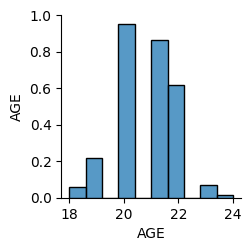

In [39]:
sns.pairplot(data1)

In [40]:
data1.AGE.skew()

-0.014220088320115927

The age is distributted normally

Age is skew symmetrically distributted

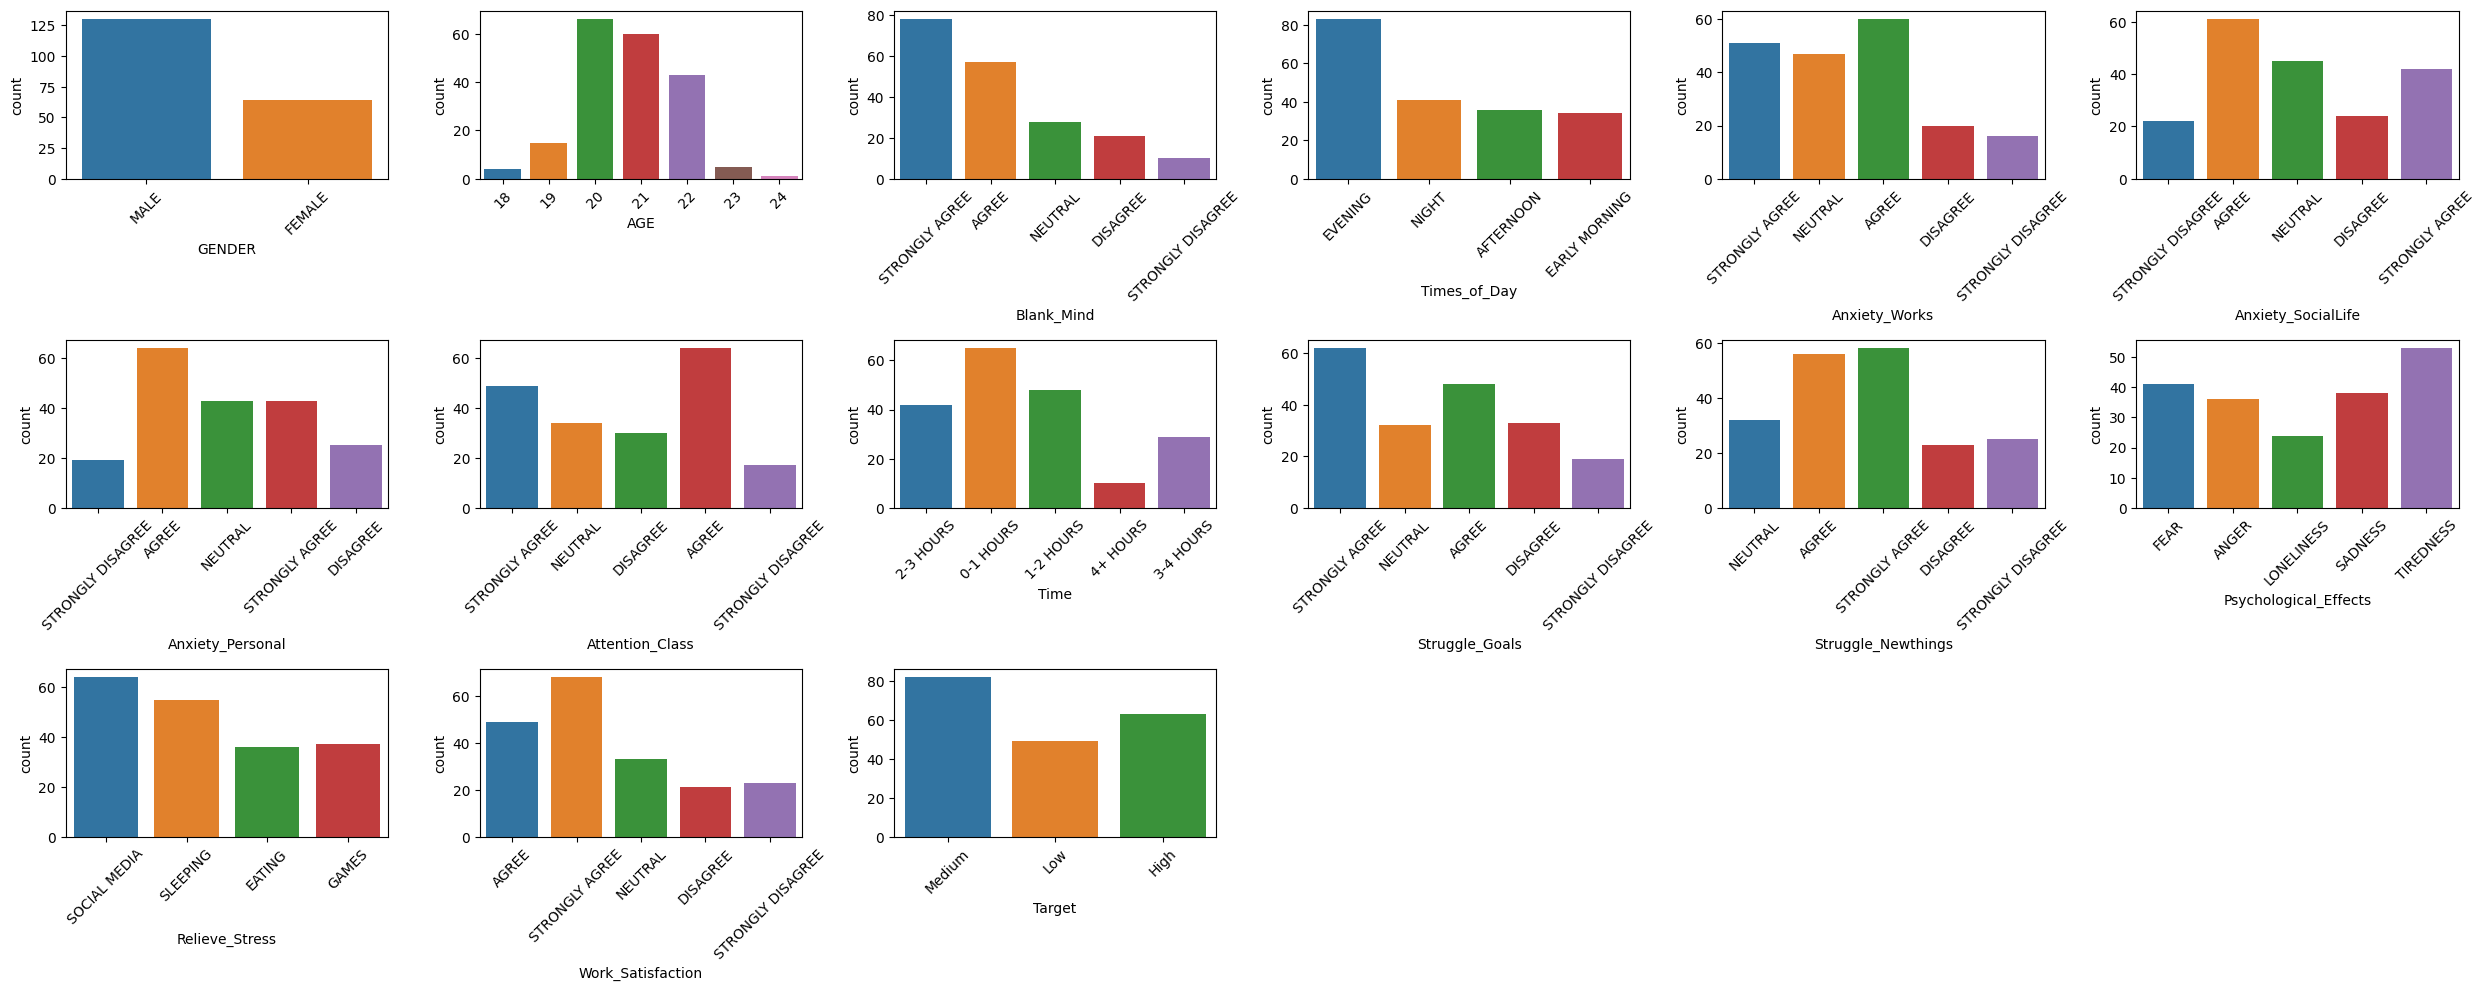

In [41]:
import seaborn as sns
plt.figure(figsize=(25,10))
i = 1
for column in data1:
    plt.subplot(3,6,i)
    sns.countplot(x=column,data=data1)
    plt.xticks(rotation=45)
    i=i+1
plt.tight_layout()


By the above countplot shows that count of observations of each feature column ,in gender column males are more,in Times of day most of students affected by evening, if we saw at target feature students have medium stress more,then students have high stress.


## BIvariate analysis (comparing features with output feature)

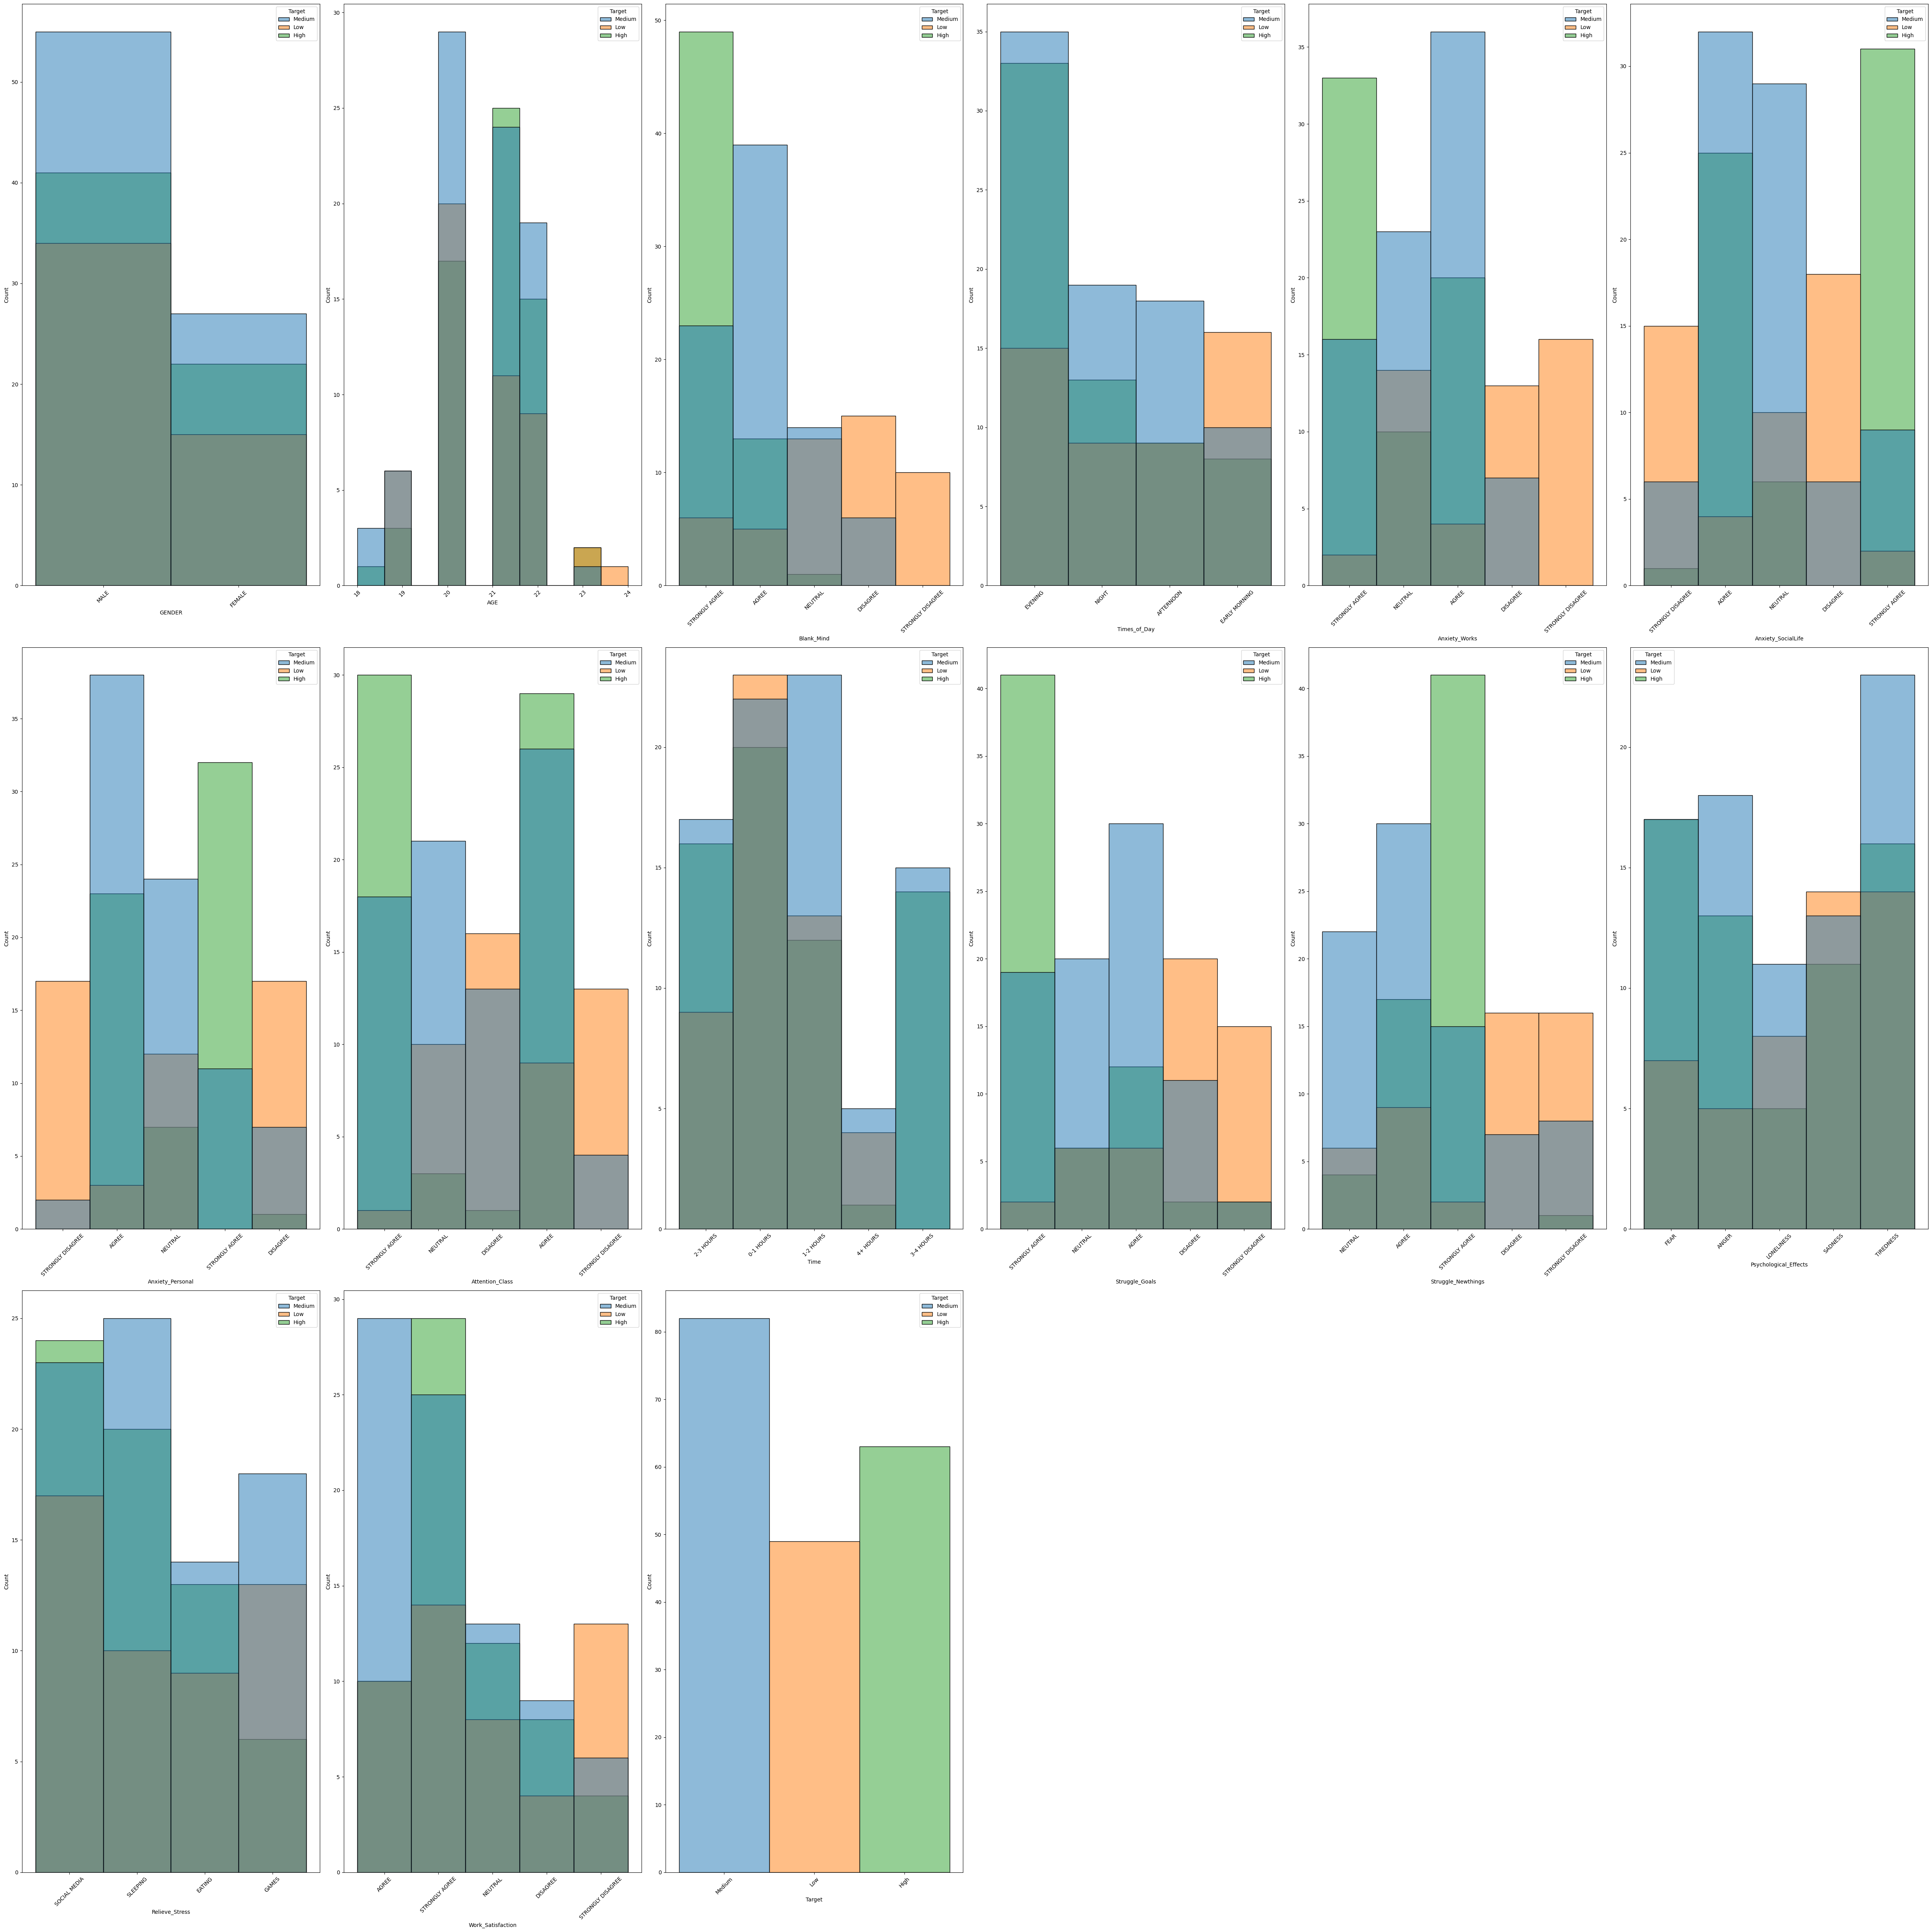

In [42]:
import seaborn as sns
plt.figure(figsize=(50,50))
i = 1
for column in data1:
    plt.subplot(3,6,i)
    sns.histplot(x=data1[column],hue=data1.Target)
    plt.xticks(rotation=45)
    i=i+1
plt.tight_layout()

By above plot tells that information like the obeservations is compared with target variables with that we can understand the observations are affected by the target labels in that feature.
But the above histplot shows that it combines with another label different colour should shown at that bar.

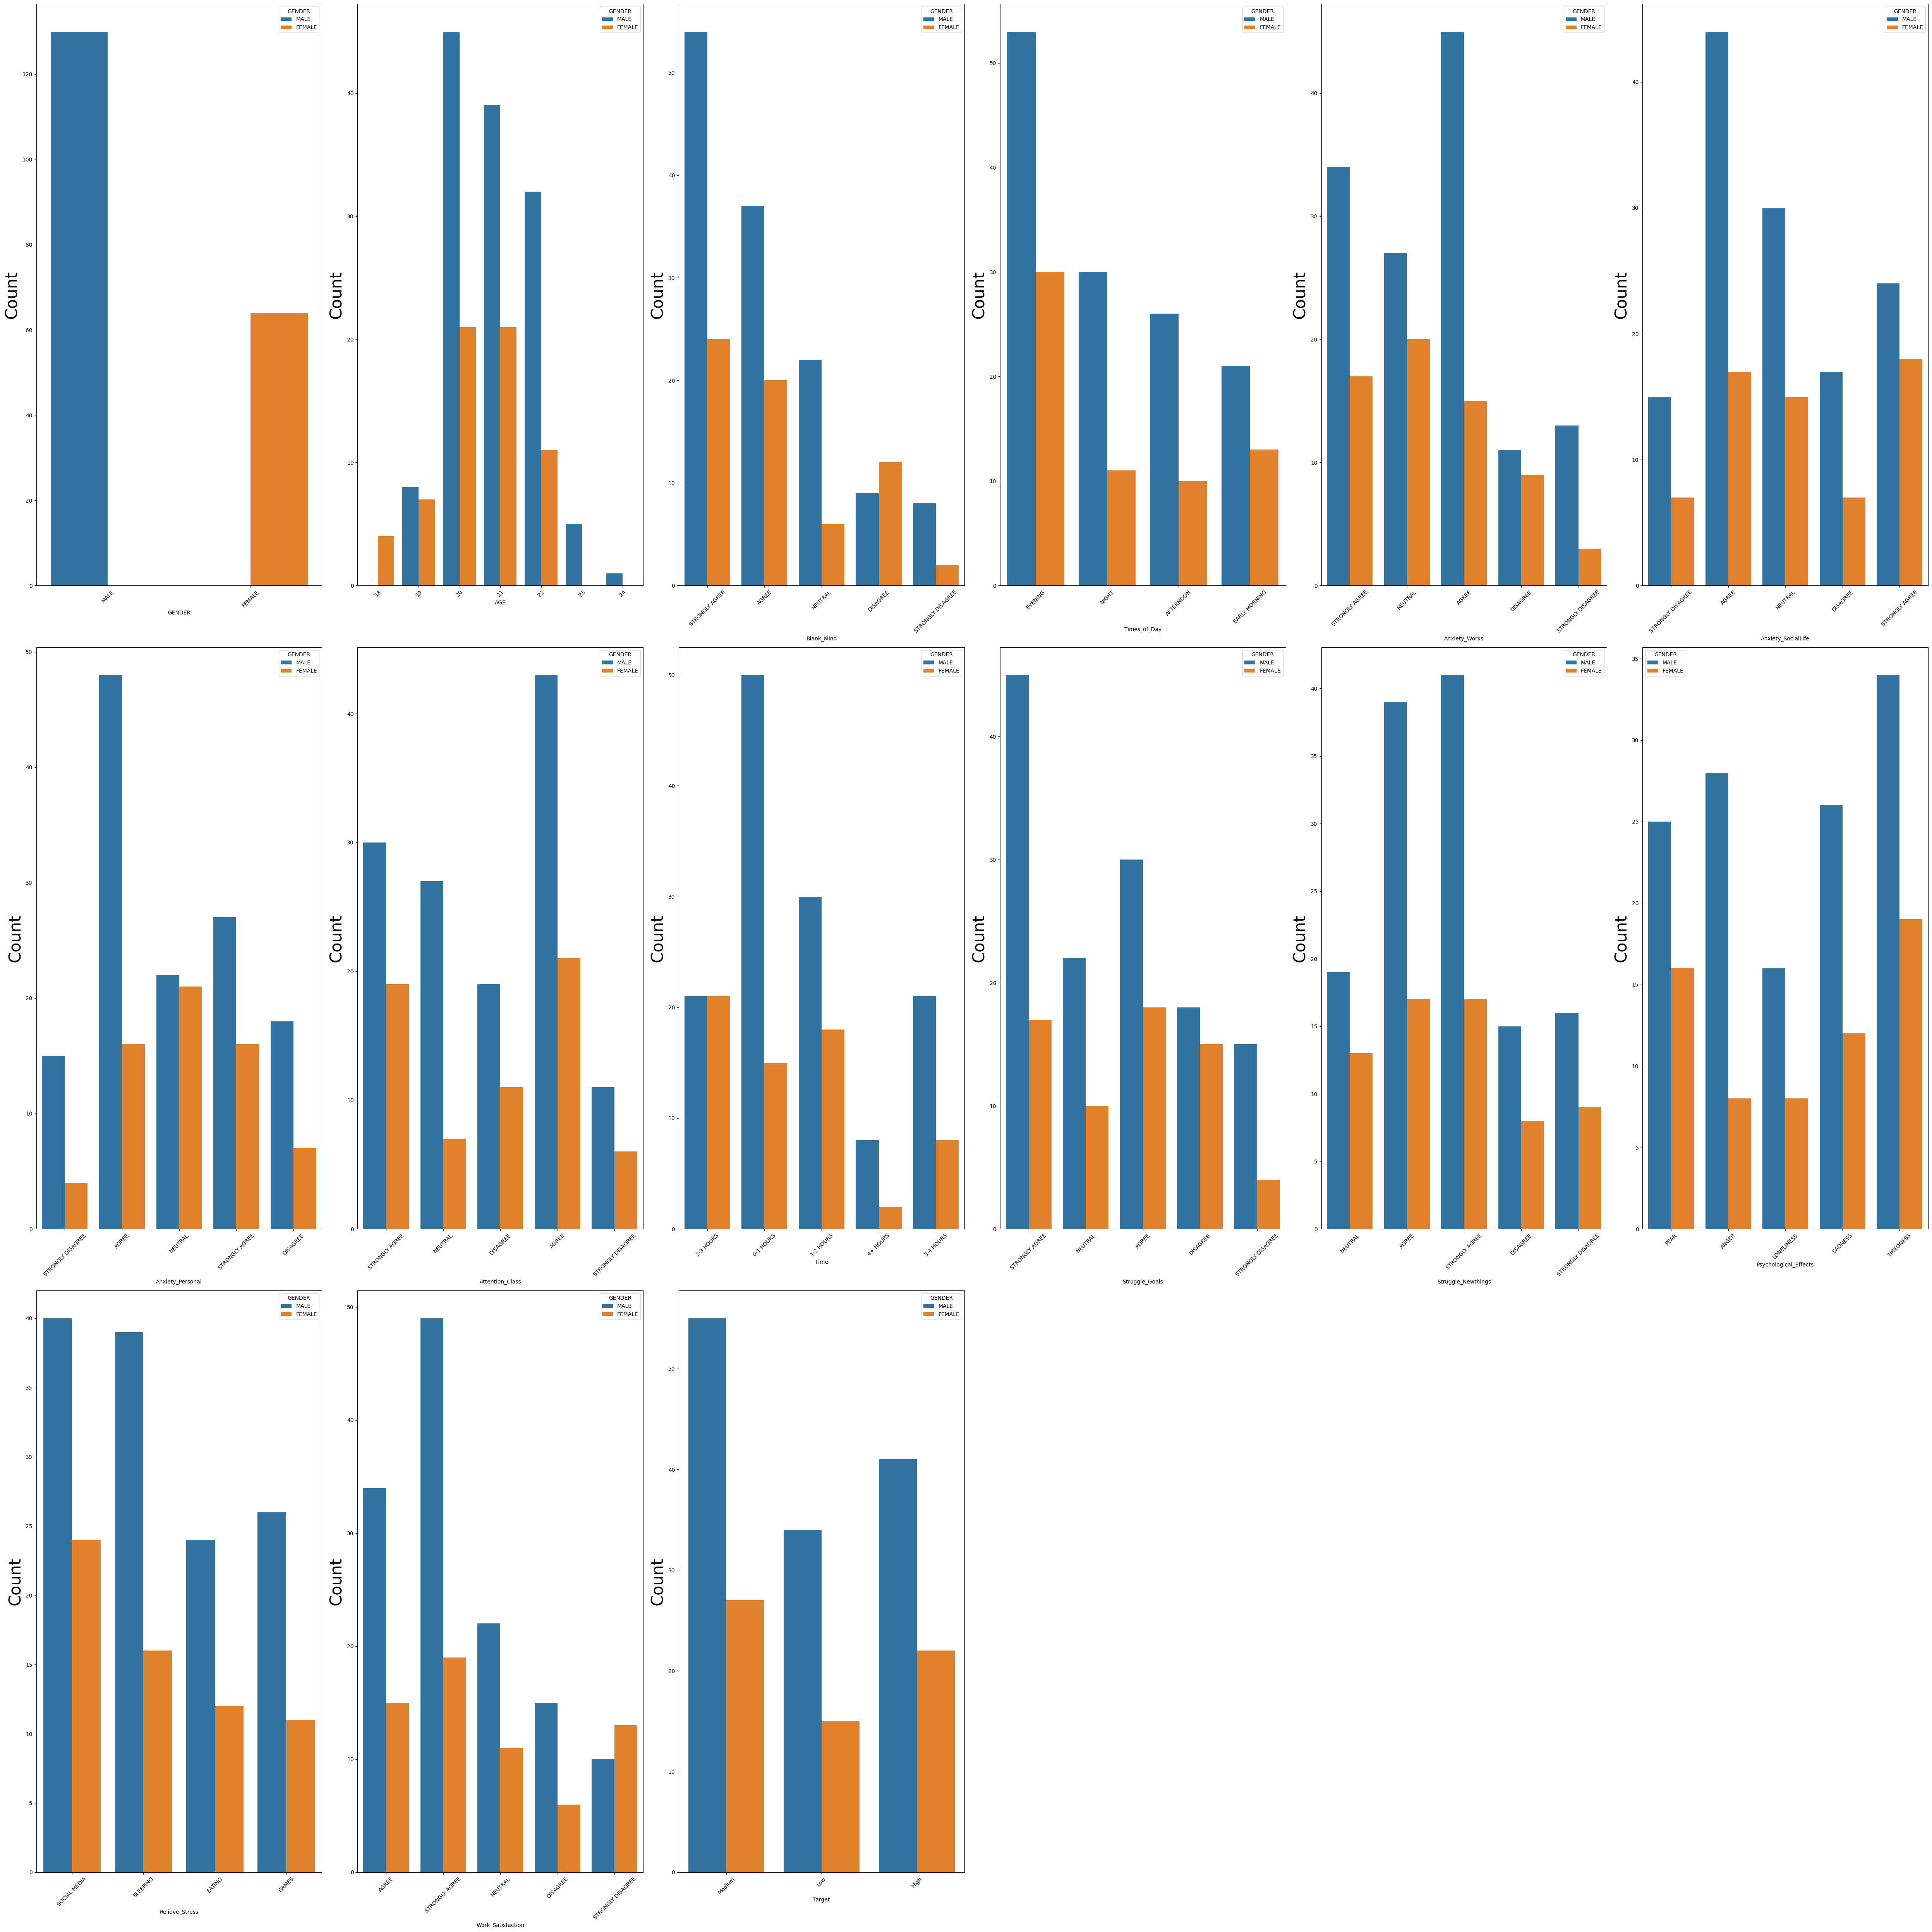

In [43]:
import seaborn as sns
plt.figure(figsize=(50,50))
i = 1
for column in data1:
    plt.subplot(3,6,i)
    sns.countplot(x=data1[column],hue=data1.GENDER)
    plt.xticks(rotation=45)
    plt.ylabel('Count',fontsize=30)
    i=i+1
plt.tight_layout()

By above countplot shows that the features are compared with Gender we saw males are affected to stress more compared with females.

## Data Preprocessing & Label encoding

In [44]:
data.columns

Index(['GENDER', 'AGE', 'Blank_Mind', 'Times_of_Day', 'Anxiety_Works',
       'Anxiety_SocialLife', 'Anxiety_Personal', 'Attention_Class', 'Time',
       'Struggle_Goals', 'Struggle_Newthings', 'Psychological_Effects',
       'Relieve_Stress', 'Work_Satisfaction', 'Target'],
      dtype='object')

In [45]:
df4 = data.copy()

### The features we are doing the label encoding.

In [46]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df4["GENDER"]              = lc.fit_transform(df4["GENDER"])
df4["Blank_Mind"]          = lc.fit_transform(df4["Blank_Mind"])
df4["Times_of_Day"]        = lc.fit_transform(df4["Times_of_Day"])
df4["Anxiety_Works"]       = lc.fit_transform(df4["Anxiety_Works"])
df4["Anxiety_SocialLife"]  = lc.fit_transform(df4["Anxiety_SocialLife"])
df4["Anxiety_Personal"]    = lc.fit_transform(df4["Anxiety_Personal"])
df4["Attention_Class"]     = lc.fit_transform(df4["Attention_Class"])
df4["Time"]                = lc.fit_transform(df4["Time"])
df4["Struggle_Goals"]      = lc.fit_transform(df4["Struggle_Goals"])
df4["Struggle_Newthings"]  = lc.fit_transform(df4["Struggle_Newthings"])
df4["Psychological_Effects"]  = lc.fit_transform(df4["Psychological_Effects"])
df4["Relieve_Stress"]  = lc.fit_transform(df4["Relieve_Stress"])
df4["Work_Satisfaction"]   = lc.fit_transform(df4["Work_Satisfaction"])

In [47]:
final_data=df4.copy()
final_data

,GENDER,AGE,Blank_Mind,Times_of_Day,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Time,Struggle_Goals,Struggle_Newthings,Psychological_Effects,Relieve_Stress,Work_Satisfaction,Target
0,1,22,3,2,3,4,4,3,2,3,2,1,3,0,Medium
1,1,20,0,3,2,0,0,2,0,2,2,0,3,3,Medium
2,1,21,0,2,2,0,2,2,1,3,0,2,3,0,Medium
3,1,22,0,2,0,2,3,2,0,0,0,1,2,0,Medium
4,1,20,0,2,3,0,0,1,4,3,3,1,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,21,3,2,0,0,2,2,2,1,3,4,1,1,Medium
190,1,23,0,2,2,3,3,3,0,2,3,0,2,2,High
191,1,23,4,1,2,4,4,4,4,4,4,2,3,4,Low
192,0,21,3,2,3,3,3,3,2,3,3,4,0,3,High


In [48]:
final_data["Target"] = lc.fit_transform(final_data.Target)
final_data   ### Applying the label encoding

,GENDER,AGE,Blank_Mind,Times_of_Day,Anxiety_Works,Anxiety_SocialLife,Anxiety_Personal,Attention_Class,Time,Struggle_Goals,Struggle_Newthings,Psychological_Effects,Relieve_Stress,Work_Satisfaction,Target
0,1,22,3,2,3,4,4,3,2,3,2,1,3,0,2
1,1,20,0,3,2,0,0,2,0,2,2,0,3,3,2
2,1,21,0,2,2,0,2,2,1,3,0,2,3,0,2
3,1,22,0,2,0,2,3,2,0,0,0,1,2,0,2
4,1,20,0,2,3,0,0,1,4,3,3,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,21,3,2,0,0,2,2,2,1,3,4,1,1,2
190,1,23,0,2,2,3,3,3,0,2,3,0,2,2,0
191,1,23,4,1,2,4,4,4,4,4,4,2,3,4,1
192,0,21,3,2,3,3,3,3,2,3,3,4,0,3,0


## Feature selection

<Axes: >

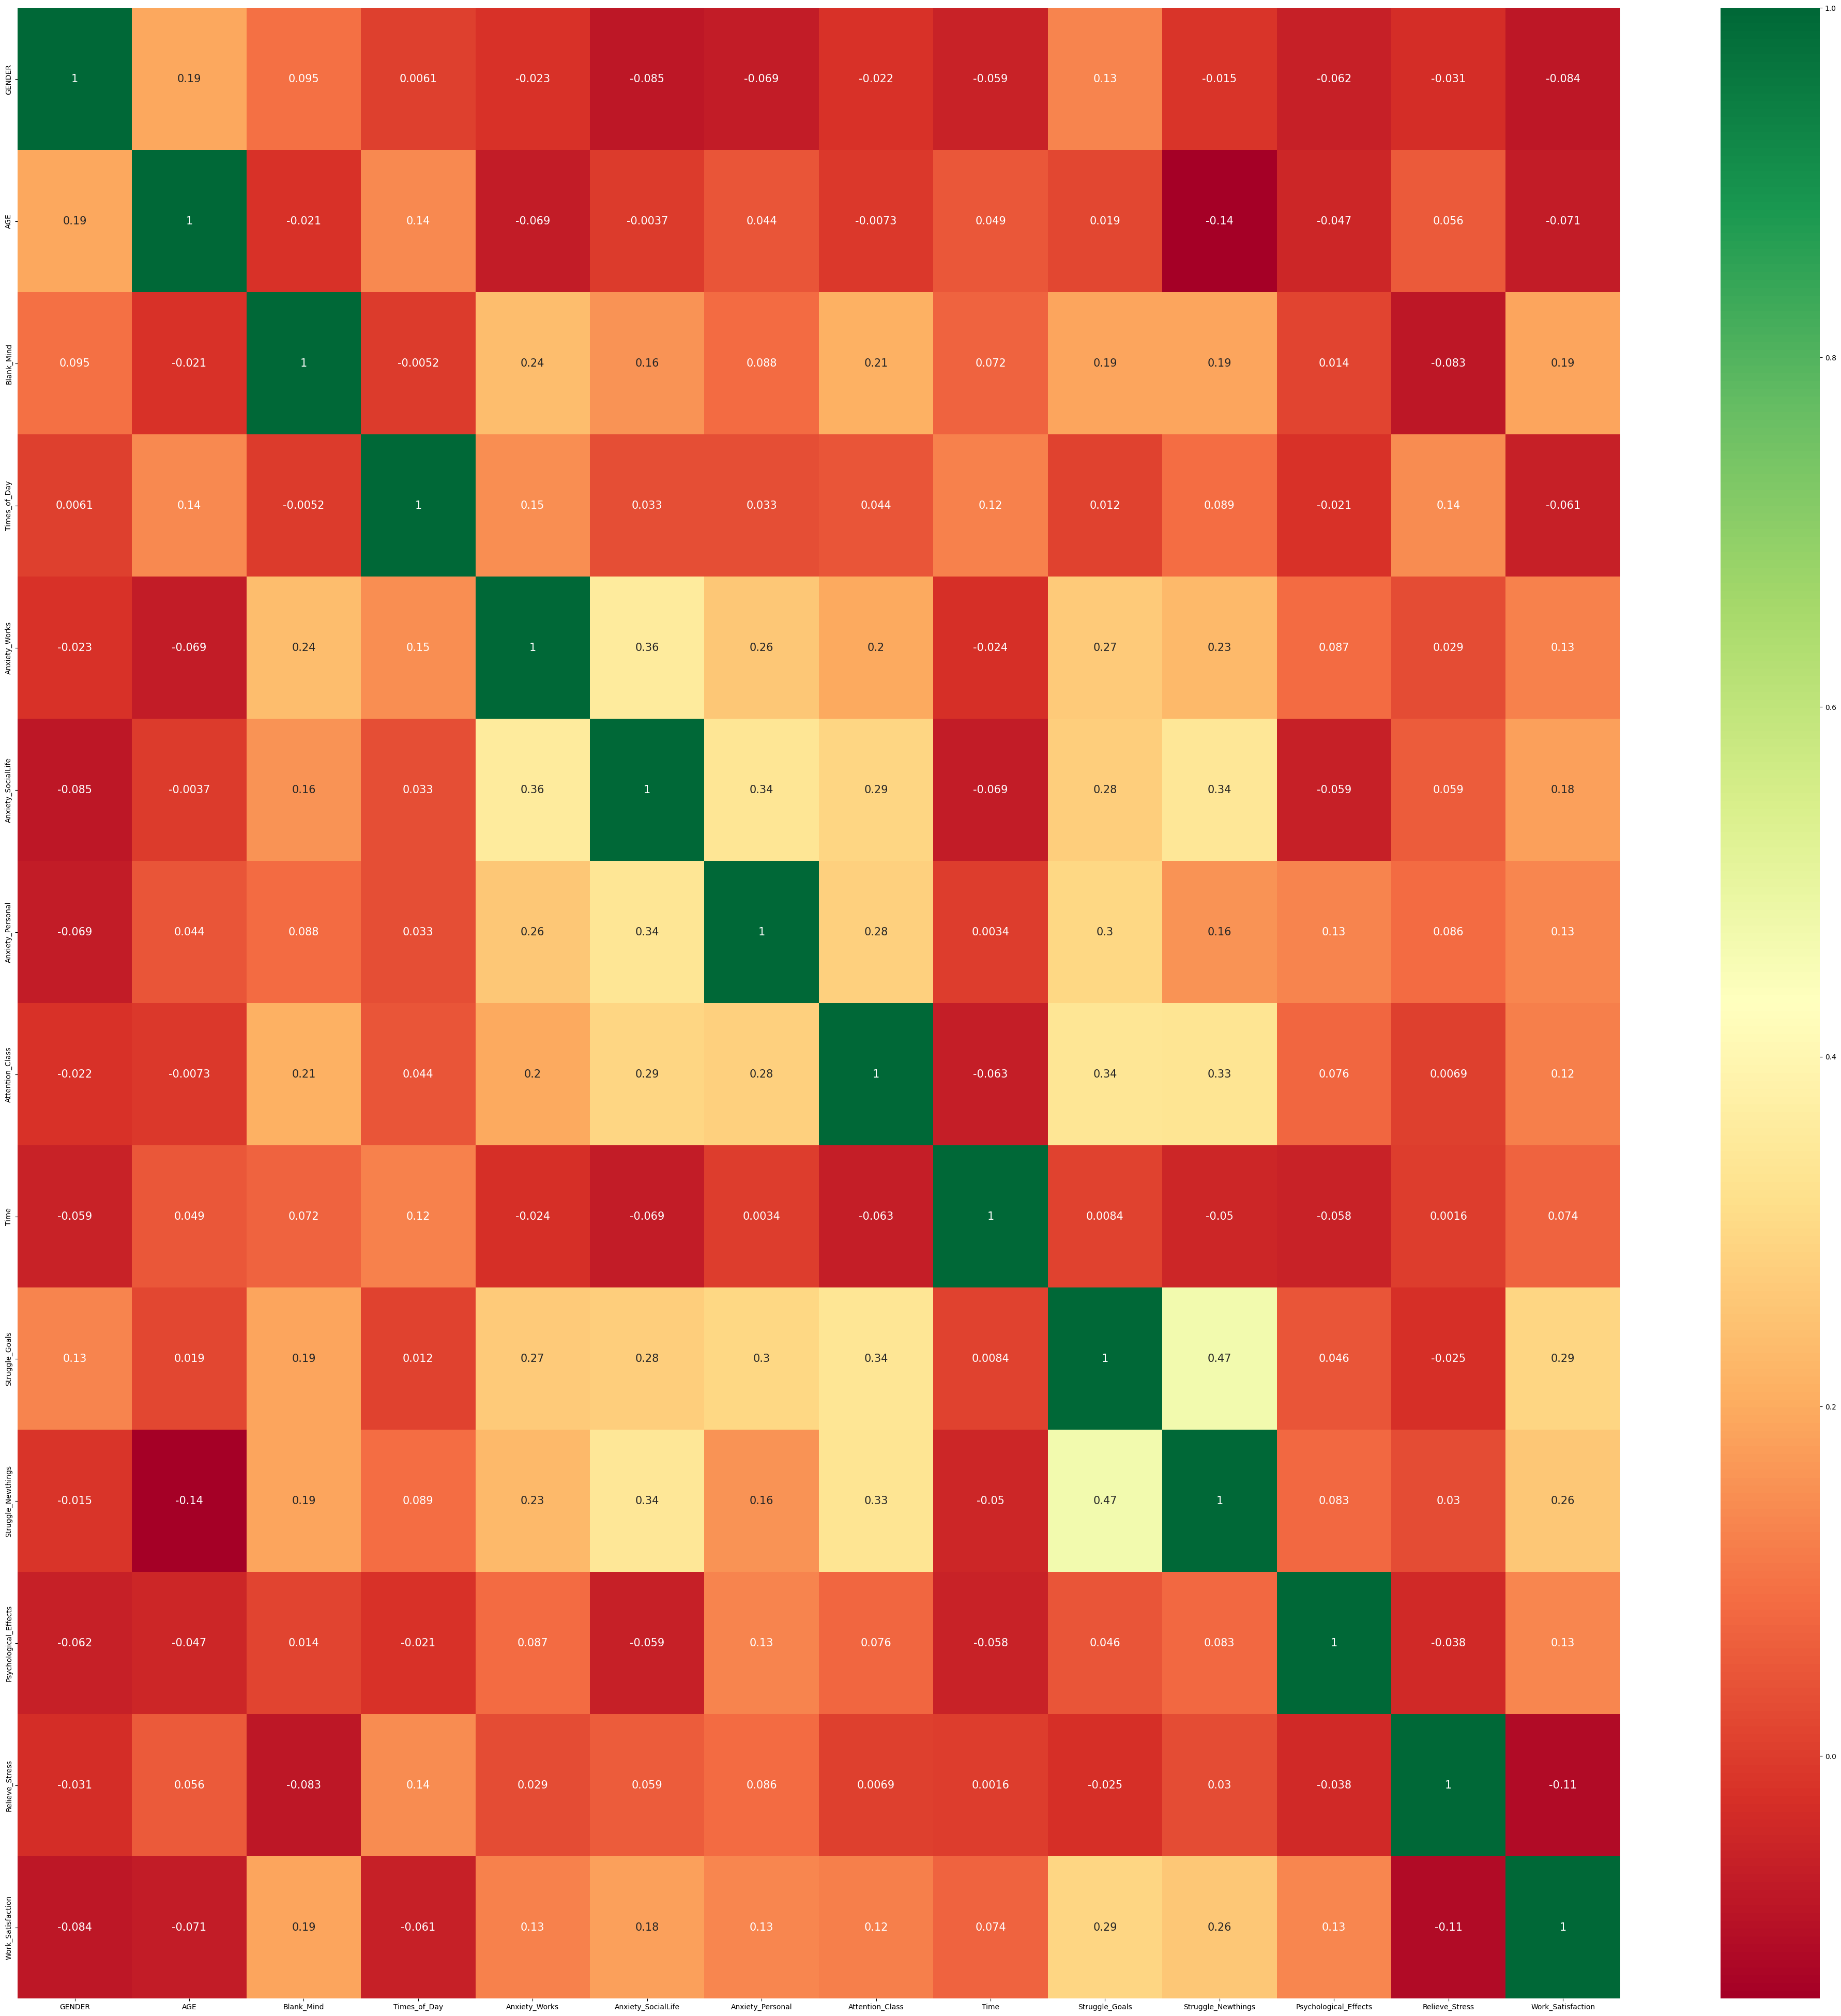

In [49]:
data5 = final_data.drop('Target',axis=True)

plt.figure(figsize=(50,50))
sns.heatmap(data5.corr(),annot=True,cmap="RdYlGn",annot_kws={"size":15})

### The above heatmap shows that there is no correlation between the features

## Model Creation

In [103]:
X=final_data.drop("Target",axis=1)
y=final_data.Target

## Scaling the data

In [51]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
#sc=MinMaxScaler()
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.70164642,  1.19058898,  0.87416632, ..., -0.78677436,
         1.12469871, -1.41645073],
       [ 0.70164642, -0.68725055, -1.32827869, ..., -1.45329936,
         1.12469871,  0.73596265],
       [ 0.70164642,  0.25166921, -1.32827869, ..., -0.12024936,
         1.12469871, -1.41645073],
       ...,
       [ 0.70164642,  2.12950874,  1.60831465, ..., -0.12024936,
         1.12469871,  1.45343378],
       [-1.42521928,  0.25166921,  0.87416632, ...,  1.21280065,
        -1.56902413,  0.73596265],
       [ 0.70164642, -0.68725055, -1.32827869, ..., -0.12024936,
         1.12469871,  1.45343378]])

## Train & test data

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

## Logistic Regression

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
lr= OneVsRestClassifier(LogisticRegression())
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

y_preda = lr.predict_proba(X_test)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
lr_acc_score= accuracy_score(y_test,y_pred)
lr_precision = precision_score(y_test,y_pred, average='weighted')
lr_recall = recall_score(y_test,y_pred, average='weighted')
lr_f1_score = f1_score(y_test,y_pred, average='weighted')

lr_cv_score = cross_val_score(lr, X_scaled, y, cv=3, scoring = 'accuracy').mean()
lr_AUC = roc_auc_score(y_test, y_preda, multi_class='ovr')

              precision    recall  f1-score   support

           0       0.33      0.23      0.27        13
           1       0.38      0.27      0.32        11
           2       0.50      0.73      0.59        15

    accuracy                           0.44        39
   macro avg       0.40      0.41      0.39        39
weighted avg       0.41      0.44      0.41        39

[[ 3  4  6]
 [ 3  3  5]
 [ 3  1 11]]


The Logistic Regression model gives 44% accuracy

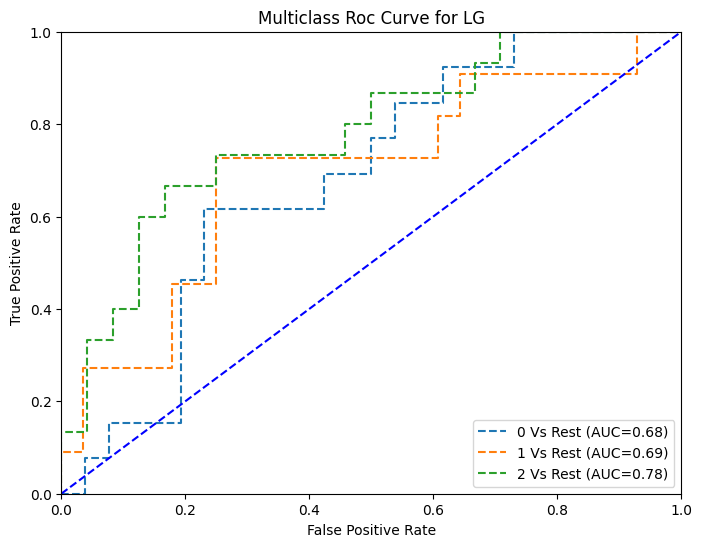

In [55]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for LG')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# KNN

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [105]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#sc=MinMaxScaler()
sc=StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [107]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)

y_pred1 = knn.predict(x_test_scaled)

In [108]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.50      0.50      0.50        12
           2       0.56      0.48      0.51        21

    accuracy                           0.51        49
   macro avg       0.51      0.51      0.51        49
weighted avg       0.52      0.51      0.51        49



## finding best value for k

In [109]:
acc_list = []
for k in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    acc= accuracy_score(y_test,y_pred)
    acc_list.append(acc)

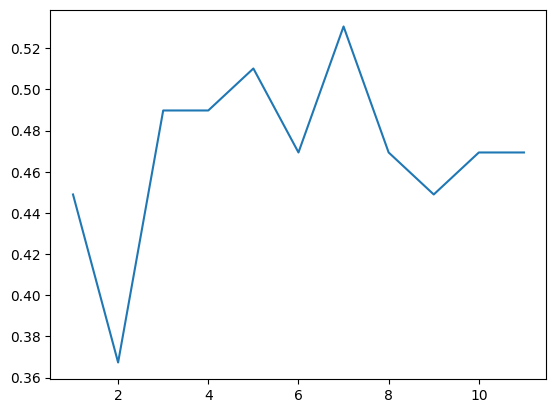

In [110]:
plt.plot(range(1,12),acc_list)

In [111]:
error_rate= []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    pred_i = knn.predict(x_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

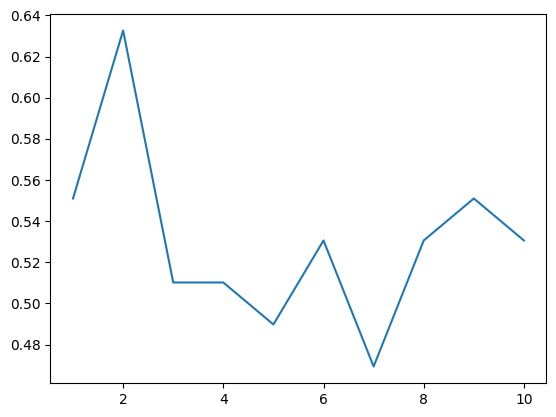

In [112]:
plt.plot(range(1,11),error_rate)

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)

y_pre = knn.predict(x_test_scaled)

knn.probability = True
y_preda1 = knn.predict_proba(x_test_scaled)

In [114]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))
knn_acc_score= accuracy_score(y_test,y_pre)
knn_precision = precision_score(y_test,y_pre, average ='weighted')
knn_recall = recall_score(y_test,y_pre, average='weighted')
knn_f1_score = f1_score(y_test,y_pre, average='weighted')

knn_cv_score = cross_val_score(knn, X, y, cv=3, scoring = 'accuracy').mean()

knn_AUC = roc_auc_score(y_test,y_preda1, multi_class = 'ovr')

              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.50      0.50      0.50        12
           2       0.56      0.48      0.51        21

    accuracy                           0.51        49
   macro avg       0.51      0.51      0.51        49
weighted avg       0.52      0.51      0.51        49

[[ 9  2  5]
 [ 3  6  3]
 [ 7  4 10]]


The Above KNN model gives 51% accuracy

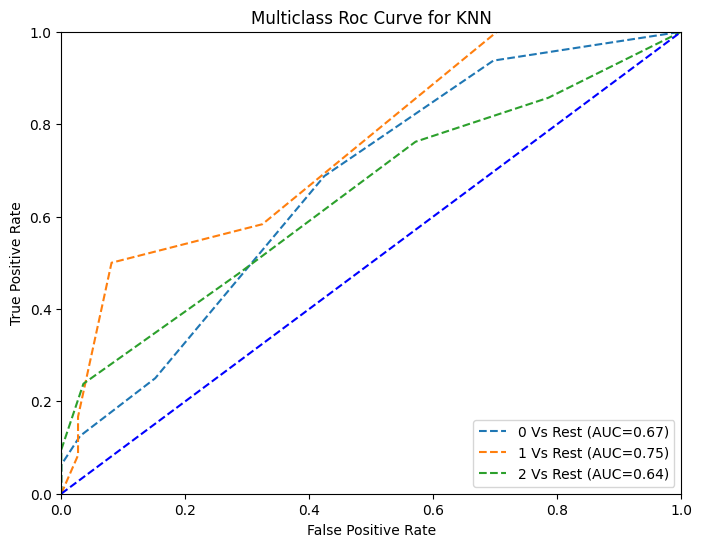

In [115]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine (SVM)

In [68]:
X=final_data.drop("Target",axis=1)
y=final_data.Target

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_train,y_train)

y_pred2=svc.predict(x_test)

y_preda2 = svc.predict_proba(x_test)

In [71]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
svc_acc_score= accuracy_score(y_test,y_pred2)
svc_precision = precision_score(y_test,y_pred2, average = 'weighted')
svc_recall = recall_score(y_test,y_pred2, average='weighted')
svc_f1_score = f1_score(y_test,y_pred2, average='weighted')

svc_cv_score = cross_val_score(svc, X, y, cv=3, scoring = 'accuracy').mean()

svc_AUC = roc_auc_score(y_test,y_preda2, multi_class='ovr')

              precision    recall  f1-score   support

           0       0.27      0.23      0.25        13
           1       0.00      0.00      0.00        11
           2       0.43      0.80      0.56        15

    accuracy                           0.38        39
   macro avg       0.23      0.34      0.27        39
weighted avg       0.26      0.38      0.30        39

[[ 3  0 10]
 [ 5  0  6]
 [ 3  0 12]]


The SVM Model give 38% accuracy

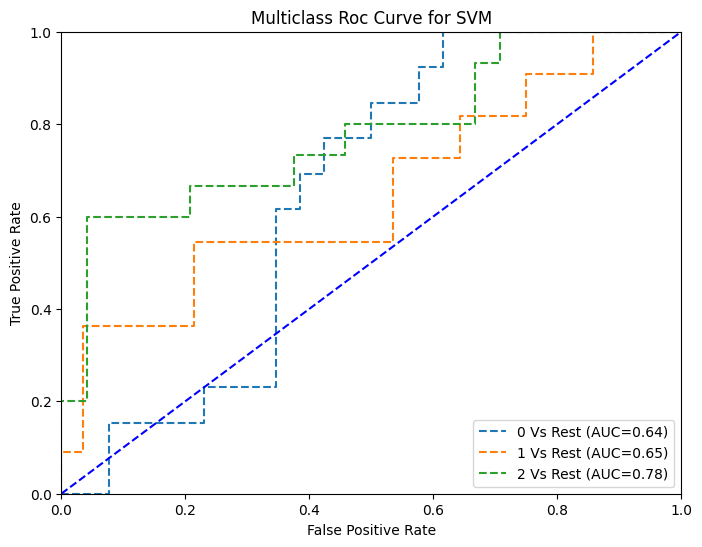

In [72]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [73]:
X=final_data.drop("Target",axis=1)
y=final_data.Target

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.tree import DecisionTreeClassifier # import decision algorithm
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt.probability=True
y_pred4 = dt.predict(X_test)

y_preda4 = dt.predict_proba(X_test)

In [76]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
dt_acc_score= accuracy_score(y_test,y_pred4)
dt_precision = precision_score(y_test,y_pred4, average='weighted')
dt_recall = recall_score(y_test,y_pred4, average='weighted')
dt_f1_score = f1_score(y_test,y_pred4,average='weighted')

dt_cv_score = cross_val_score(dt, X, y, cv=3, scoring = 'accuracy').mean()

dt_AUC = roc_auc_score(y_test,y_preda4, multi_class = 'ovr')  #AUC

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.75      0.55      0.63        11
           2       0.61      0.73      0.67        15

    accuracy                           0.67        39
   macro avg       0.68      0.66      0.66        39
weighted avg       0.68      0.67      0.67        39

[[ 9  1  3]
 [ 1  6  4]
 [ 3  1 11]]


The Decision Tree Model gives 67% accuracy

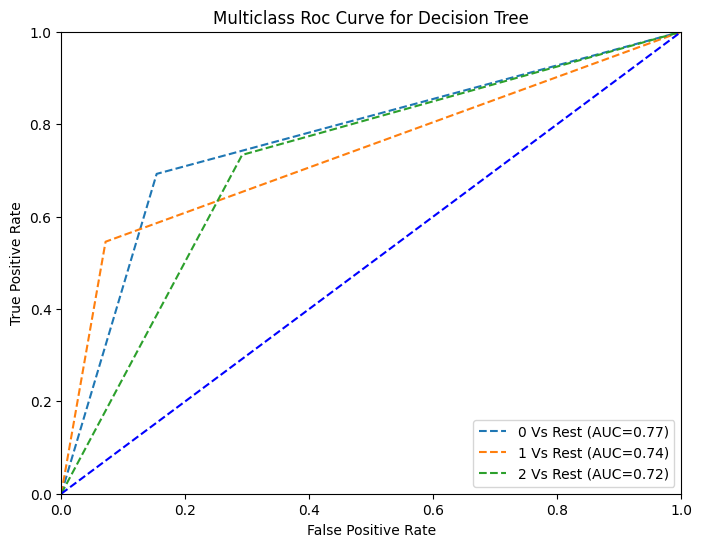

In [77]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda4[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

rf.probability = True
y_pred5=rf.predict(X_test)

y_preda5 = rf.predict_proba(X_test)

In [117]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
rf_acc_score= accuracy_score(y_test,y_pred5)
rf_precision = precision_score(y_test,y_pred5, average='weighted')
rf_recall = recall_score(y_test,y_pred5, average='weighted')
rf_f1_score = f1_score(y_test,y_pred5, average='weighted')

rf_cv_score = cross_val_score(rf, X, y, cv=3, scoring = 'accuracy').mean()

rf_AUC = roc_auc_score(y_test,y_preda5, multi_class='ovr')  #AUC

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.73      0.67      0.70        12
           2       0.70      0.67      0.68        21

    accuracy                           0.71        49
   macro avg       0.72      0.72      0.71        49
weighted avg       0.71      0.71      0.71        49

[[13  0  3]
 [ 1  8  3]
 [ 4  3 14]]


The Random Forest Model gives 72% accuracy

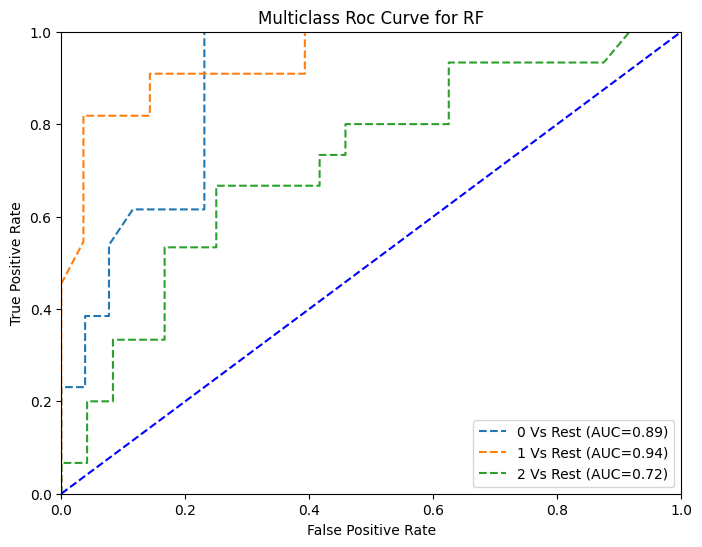

In [80]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda5[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Navie Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred6 = nb.predict(X_test)

y_preda6 = nb.predict_proba(X_test)

In [82]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
nb_acc_score= accuracy_score(y_test,y_pred6)
nb_precision = precision_score(y_test,y_pred6, average='weighted')
nb_recall = recall_score(y_test,y_pred6, average='weighted')
nb_f1_score = f1_score(y_test,y_pred6, average='weighted')

nb_cv_score = cross_val_score(nb,X, y, cv=3, scoring = 'accuracy').mean()

nb_AUC = roc_auc_score(y_test,y_preda6, multi_class='ovr')  #AUC

              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.50      0.45      0.48        11
           2       0.50      0.67      0.57        15

    accuracy                           0.49        39
   macro avg       0.48      0.48      0.47        39
weighted avg       0.48      0.49      0.48        39

[[ 4  3  6]
 [ 2  5  4]
 [ 3  2 10]]


The Navie Bayes model gives 49% accuracy

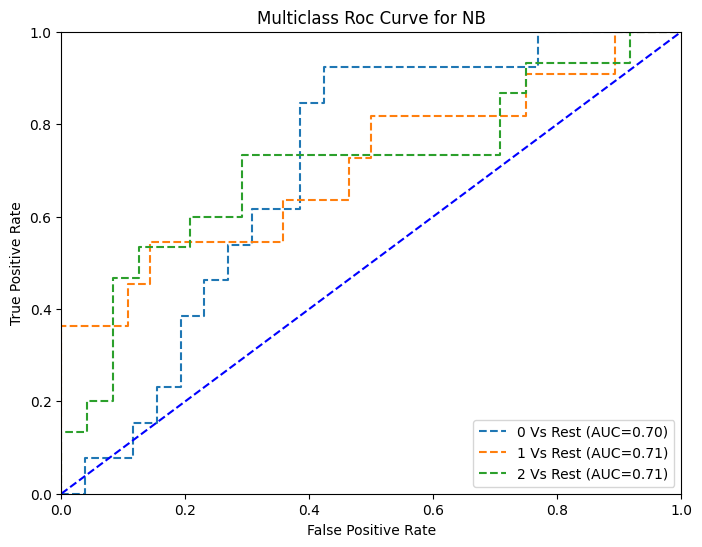

In [83]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda6[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

gbm.probability=True
gbm.fit(X_train,y_train)

y_pred7 = gbm.predict(X_test)

y_preda7 = gbm.predict_proba(X_test)

In [85]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
gb_acc_score= accuracy_score(y_test,y_pred7)
gb_precision = precision_score(y_test,y_pred7, average='weighted')
gb_recall = recall_score(y_test,y_pred7, average='weighted')
gb_f1_score = f1_score(y_test,y_pred7, average='weighted')

gb_cv_score = cross_val_score(gbm, X, y, cv=3, scoring = 'accuracy').mean()

gb_AUC = roc_auc_score(y_test,y_preda7, multi_class='ovr')  #AUC

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.80      0.73      0.76        11
           2       0.59      0.67      0.62        15

    accuracy                           0.67        39
   macro avg       0.68      0.67      0.68        39
weighted avg       0.67      0.67      0.67        39

[[ 8  0  5]
 [ 1  8  2]
 [ 3  2 10]]


The Gradient Boost Model gives 69% accuracy

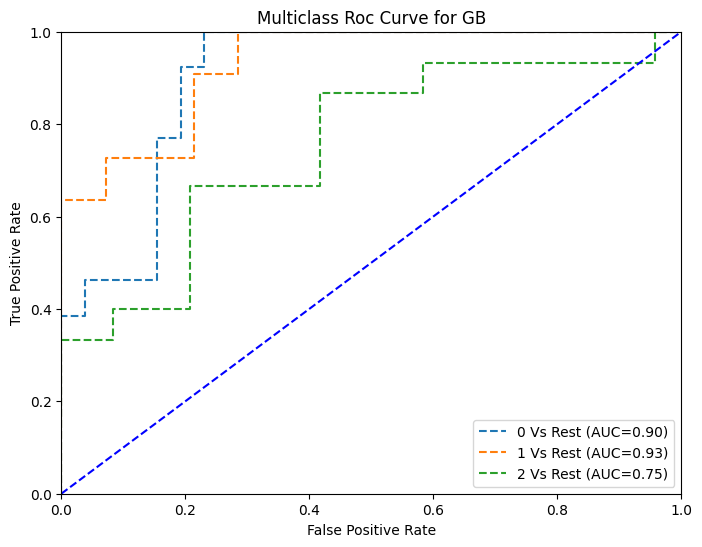

In [86]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda7[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for GB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## XG Boost

In [87]:
!pip install xgboost

In [88]:
import xgboost

In [89]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

xgb.probability = True
y_pred8 = xgb.predict(X_test)

y_preda8 = xgb.predict_proba(X_test)

In [90]:
## metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))
xgb_acc_score= accuracy_score(y_test,y_pred8)
xgb_precision = precision_score(y_test,y_pred8, average='weighted')
xgb_recall = recall_score(y_test,y_pred8, average='weighted')
xgb_f1_score = f1_score(y_test,y_pred8, average='weighted')

xgb_cv_score = cross_val_score(xgb, X, y, cv=3, scoring = 'accuracy').mean()

xgb_AUC = roc_auc_score(y_test,y_preda8, multi_class='ovr')  #AUC

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.67      0.73      0.70        11
           2       0.60      0.60      0.60        15

    accuracy                           0.64        39
   macro avg       0.64      0.65      0.65        39
weighted avg       0.64      0.64      0.64        39

[[8 1 4]
 [1 8 2]
 [3 3 9]]


The XGboost model gives 64% accuarcy

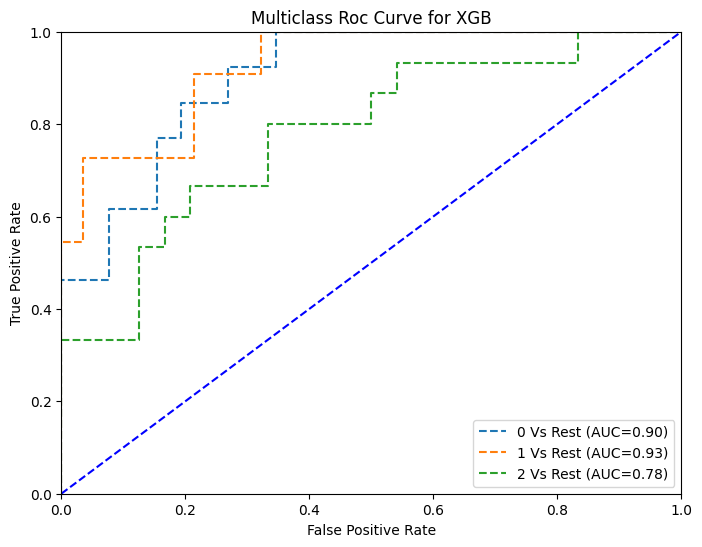

In [91]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize

#binarize y_values
classes = np.unique(y_test)
y_bin = label_binarize(y_test,classes=classes)

#roc curve for classes
fpr = {}
tpr = {}
threshold = {}
roc_auc = {}

n_class = classes.shape[0]

fig=plt.figure(figsize=(8,6))
for i in range(n_class):
    fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda8[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    #plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))


plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass Roc Curve for XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [118]:
## Final List
# # Final Report:
acc_scores=[lr_acc_score, knn_acc_score, svc_acc_score, dt_acc_score, rf_acc_score,nb_acc_score, gb_acc_score, xgb_acc_score]
precision_scores=[lr_precision, knn_precision, svc_precision, dt_precision, rf_precision,nb_precision, gb_precision, xgb_precision]
recall_scores=[lr_recall, knn_recall, svc_recall, dt_recall, rf_recall,nb_recall,gb_recall, xgb_recall]
f1_scores=[lr_f1_score, knn_f1_score, svc_f1_score, dt_f1_score, rf_f1_score,nb_f1_score, gb_f1_score, xgb_f1_score]
cv_scores=[lr_cv_score, knn_cv_score, svc_cv_score, dt_cv_score, rf_cv_score,nb_cv_score, gb_cv_score, xgb_cv_score]
AUC_scores=[lr_AUC, knn_AUC, svc_AUC, dt_AUC, rf_AUC,nb_AUC, gb_AUC, xgb_AUC]


algorithms=['Logistic Regression','KNN','SVM','DecisionTree','RandomForest','Navie Bayes','GradientBoosting','XGBoosting',]

## Plotting the Accuracy_Score vs Models

#### Accuracy Score function computes accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

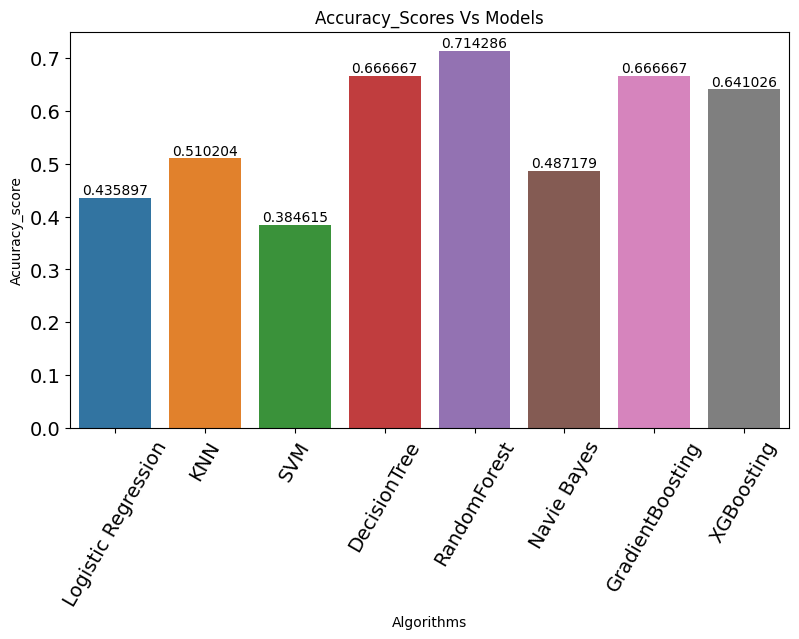

In [119]:
# plotting the barplot between algoriths and their accuracy_scores
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Acuuracy_score")
plt.title("Accuracy_Scores Vs Models")
ax=sns.barplot(x=algorithms,y=acc_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Precision_scores Vs Models

#### Precision Score is the fraction of predicted positives events that are actually positive and is a measure of the accuracy.

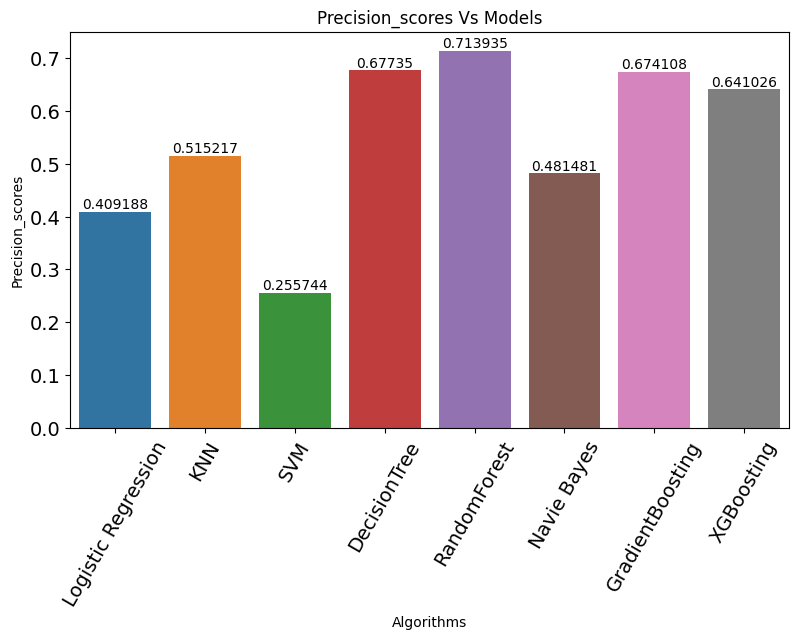

In [120]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Precision_scores")
plt.title("Precision_scores Vs Models")
ax=sns.barplot(x=algorithms,y=precision_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Recall_scores Vs Models

#### Recall (or sensitivity) Score is the fraction of positives events that were predicted correctly, or the true positive rate.

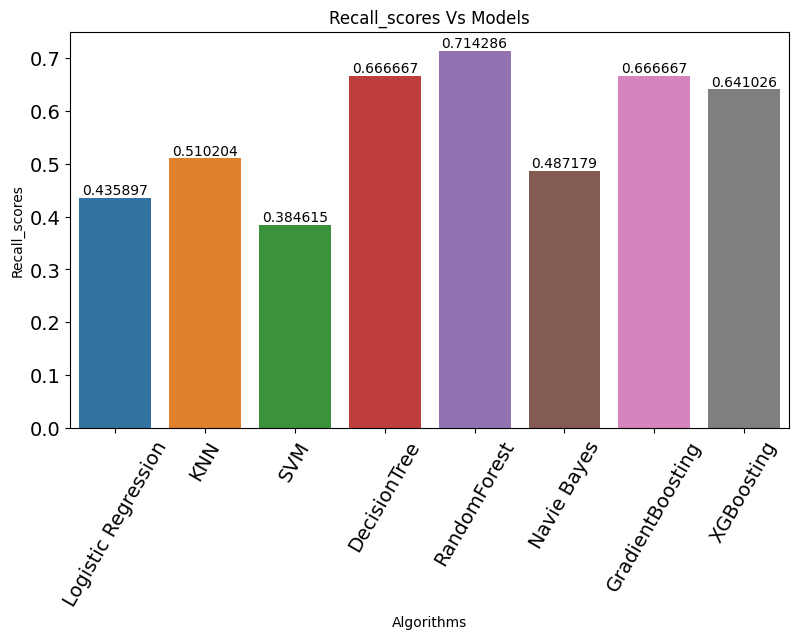

In [121]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("Recall_scores")
plt.title("Recall_scores Vs Models")
ax=sns.barplot(x=algorithms,y=recall_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

## F1_scores Vs Models

#### F1-Score is the weighted average of Precision and Recall & F1-Score of 1 is the best, with perfect precision and recall.

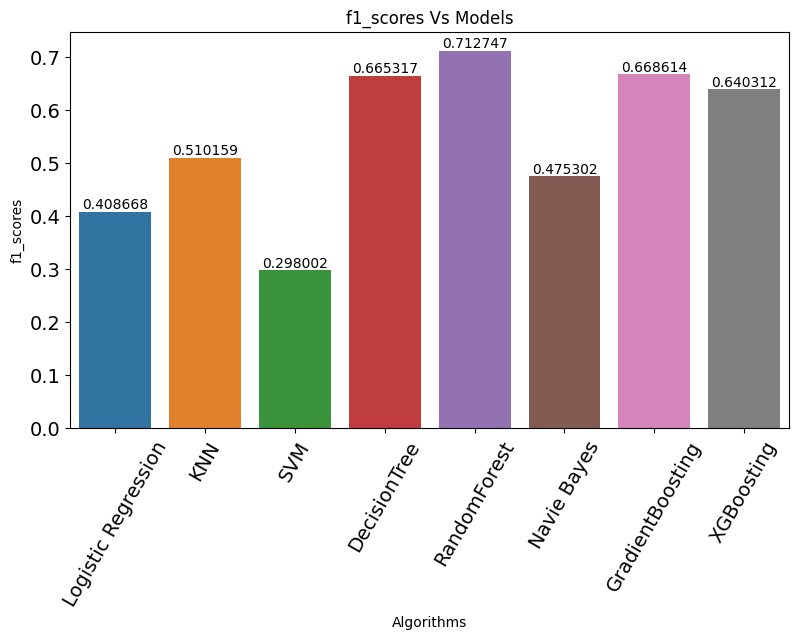

In [122]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("f1_scores")
plt.title("f1_scores Vs Models")
ax=sns.barplot(x=algorithms,y=f1_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Cross_Validation Vs Models

#### Cross Validation Score estimates a model's performance on data not used in training. Cross Validation involves:
#### 1)partitioning the data (called folds).
#### 2)perform analysis on one subset (training set).
#### 3)validate analysis on other subset (testing set).
#### 4)repeat until all data has been used in both training and testing set.

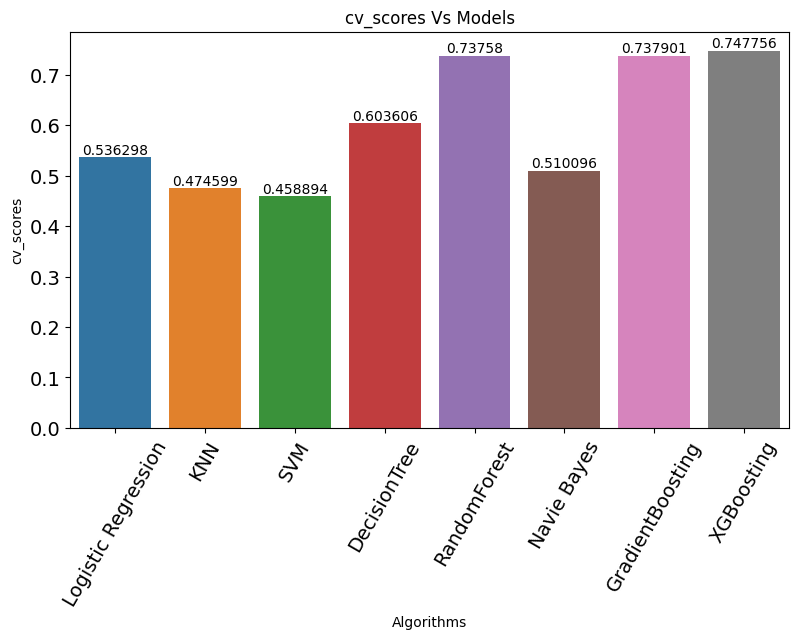

In [123]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("cv_scores")
plt.title("cv_scores Vs Models")
ax=sns.barplot(x=algorithms,y=cv_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

## AUC Score Vs Models

#### Area Under the Curve (AUC) Score is the area under the ROC curve. The greater the area under the curve, the more accurate the test.

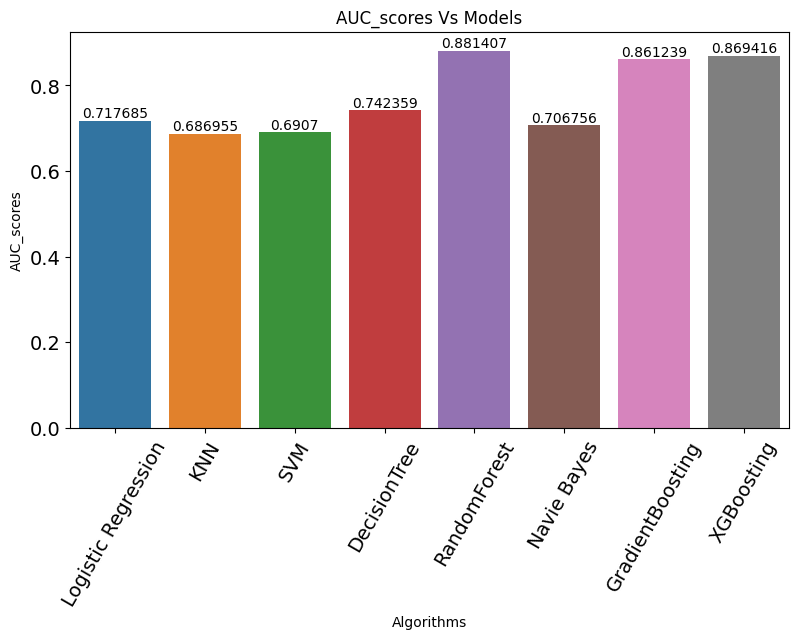

In [124]:
plt.figure(figsize=(8,6))
plt.xlabel("Algorithms")
plt.ylabel("AUC_scores")
plt.title("AUC_scores Vs Models")
ax=sns.barplot(x=algorithms,y=AUC_scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=60)
plt.tight_layout()
plt.tick_params(labelsize=14)

In [99]:
models = []   #  list with models
models.append(('DT  ', DecisionTreeClassifier()))
models.append(('KNN ', KNeighborsClassifier(n_neighbors=2)))
models.append(('LR  ', LogisticRegression(solver='liblinear')))
models.append(('RF  ', RandomForestClassifier()))
models.append(('NB  ', GaussianNB()))
models.append(('SVM ', SVC(gamma='auto')))
models.append(('GB  ', GradientBoostingClassifier()))
models.append(('XGB ', XGBClassifier()))

models.sort()
for i in models:
    print(i)

('DT  ', DecisionTreeClassifier())
('GB  ', GradientBoostingClassifier())
('KNN ', KNeighborsClassifier(n_neighbors=2))
('LR  ', LogisticRegression(solver='liblinear'))
('NB  ', GaussianNB())
('RF  ', RandomForestClassifier())
('SVM ', SVC(gamma='auto'))
('XGB ', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ra

##ROC Curves For Models


#### ROC Curves for the Receiver Operating Characteristic (ROC) Curve is a model selection probability curve and plots the true positive rate against the false positive rate. ROC plot provides:

#### relationship between sensitivity and specificity
#### 1)accuracy: closer graph is to top and left-hand borders, the more accurate the test.
#### 2)accuracy: closer graph to diagonal, the less accurate the test.
#### perfect test would go straight from zero up to top-left corner and then straight across the horizontal
#### prefect chance would follow the diagonal line and represent random outcome, i.e. flip of a coin
#### useless test is any ROC plot under the diagonal line

<Figure size 5000x5000 with 0 Axes>

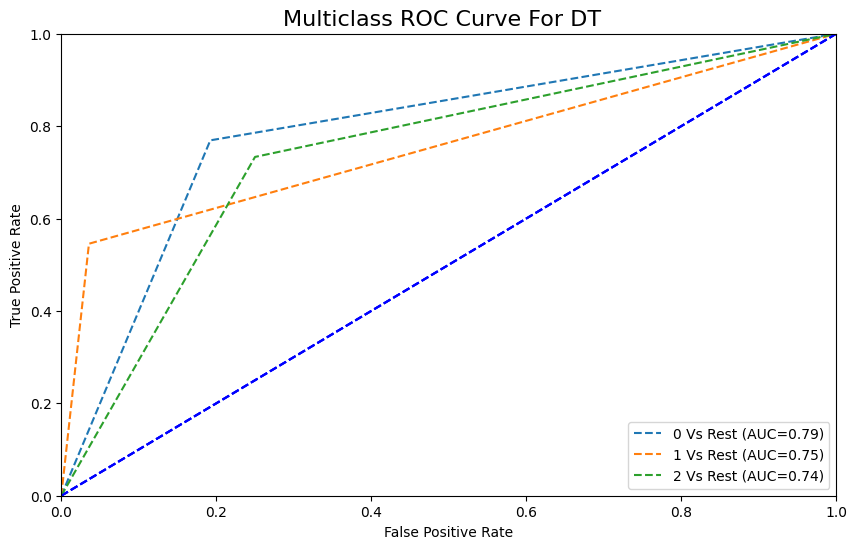

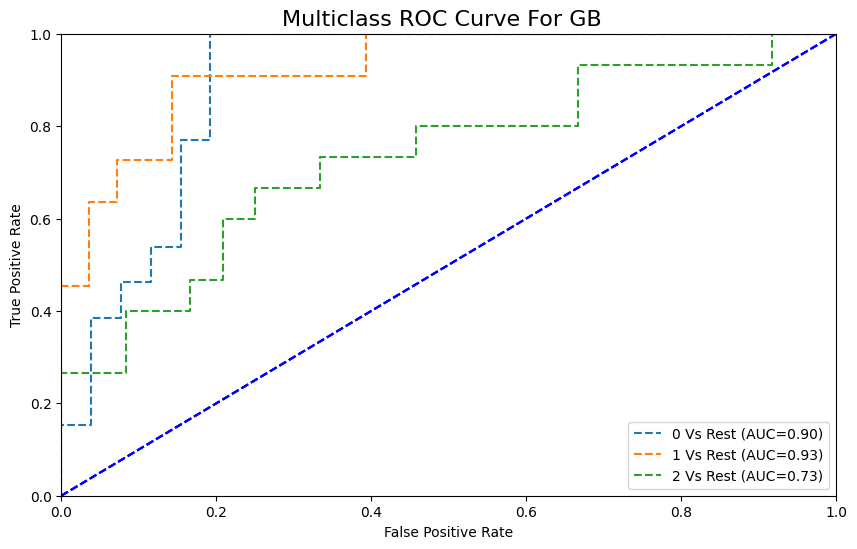

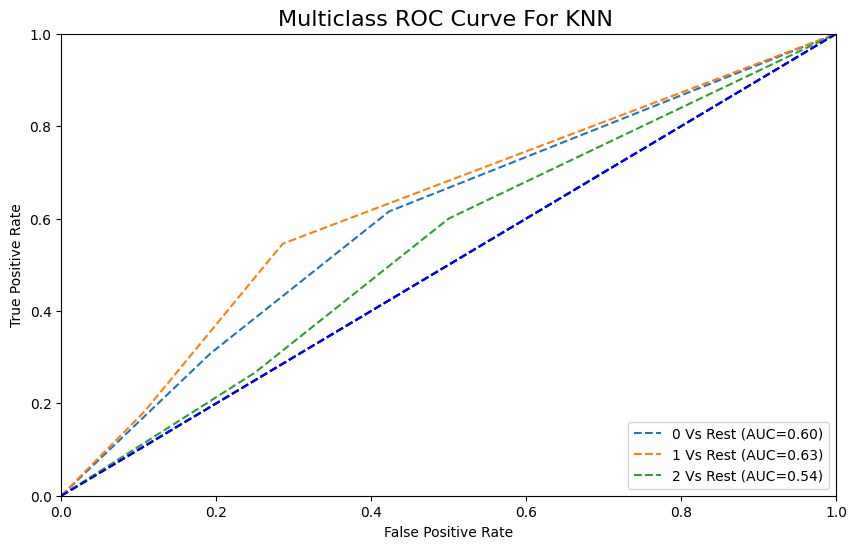

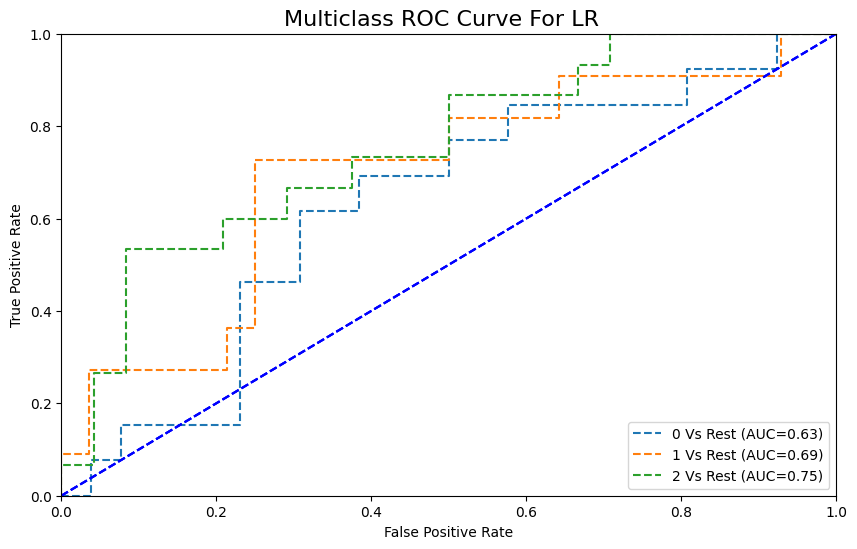

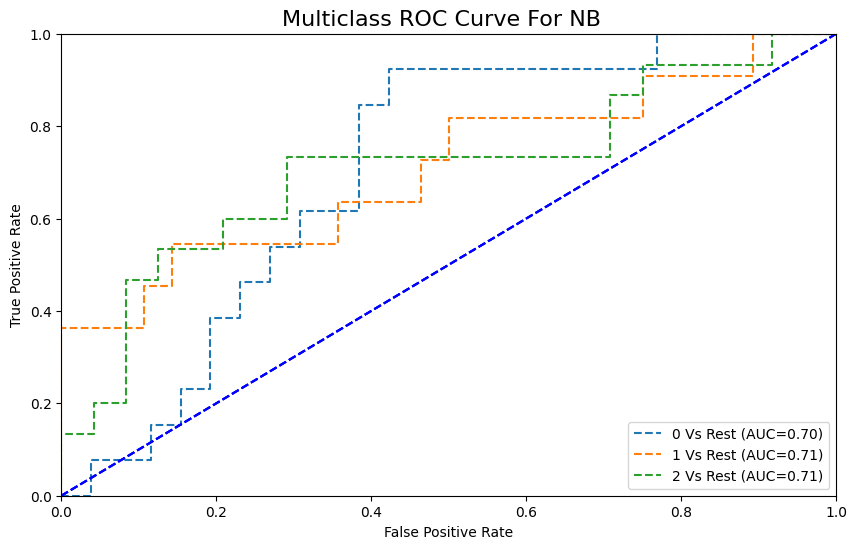

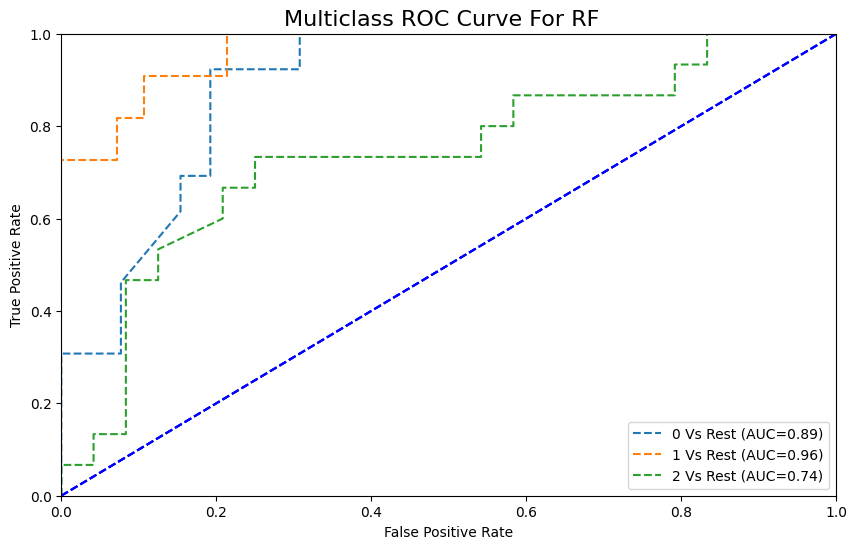

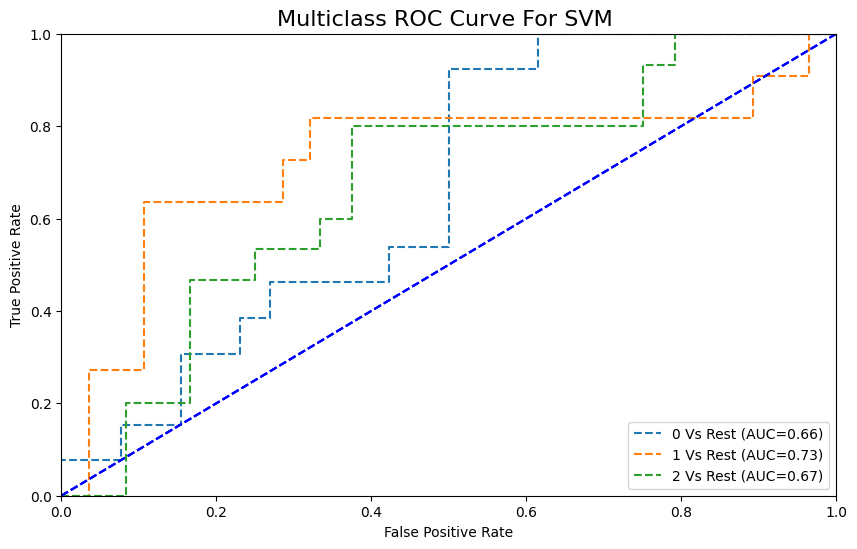

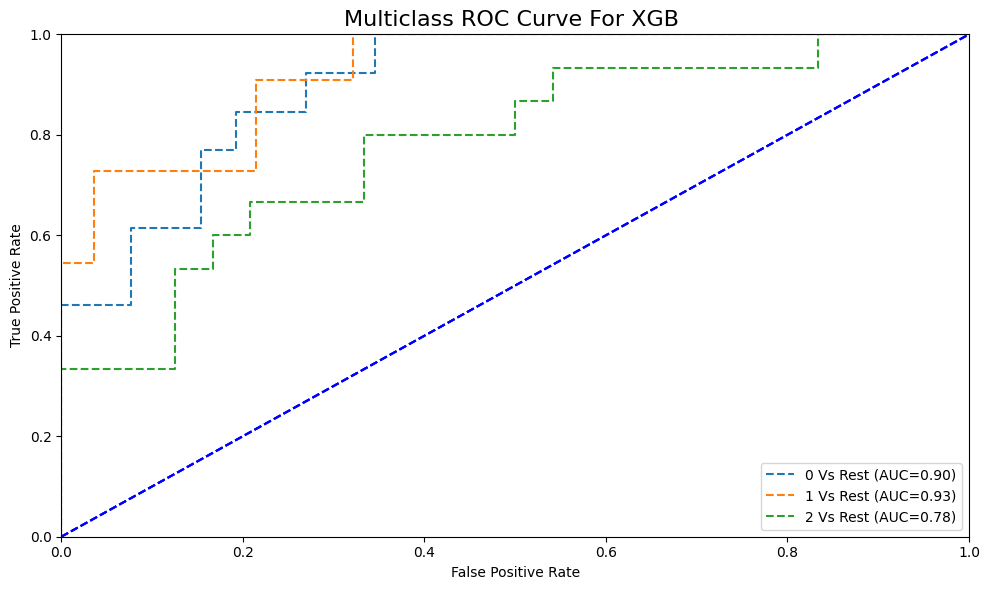

In [100]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import label_binarize


#  ROC plot
c = 1  # subplot counter
fig = plt.figure(figsize=(50,50))

for name, model in models:
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_pred = y_preda[:,1]   # positive values only

    #binarize y_values
    classes = np.unique(y_test)
    y_bin = label_binarize(y_test,classes=classes)

    #roc curve for classes
    fpr = {}
    tpr = {}
    threshold = {}
    roc_auc = {}

    n_class = classes.shape[0]

    fig=plt.figure(figsize=(10,6))

    for i in range(n_class):
      fpr[i],tpr[i],threshold[i] = roc_curve(y_bin[:,i], y_preda[:,i])
      roc_auc[i] = auc(fpr[i], tpr[i])

      #plotting
      plt.plot(fpr[i], tpr[i], linestyle='--',
               label='%s Vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
      plt.plot([0,1],[0,1],'b--')
      plt.xlim([0,1])
      plt.ylim([0,1])
      plt.title("Multiclass ROC Curve For {}".format(name), fontsize = 16)
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend(loc='lower right')

      c = c + 1

plt.tight_layout()
plt.show()

#### By above ROC Plots shows AUC Score of different models in that Random Forest,GradientBoosting, XGBoost, Decision Tree gave the best scores.

## Summary:

   After trying various models Random Forest model & GradientBoosting, Decision tree model achieved an Accuracy Score score of more than 67%, indicating that Random Forest model, it is the superior model.By trying various performance metrics tried on different models,we were finded that Random Forest Model is the best model ,next to that Gradient Boosting is also best model.

# # Conclusion:

####         Summarize by stating that your Radom forest model, with an 71% Accuracy Score, is a promising solution for your problem. It outperforms other models you've tried and provides valuable insights into the relationship between your features and target variable. However, remember to use this model responsibly and consider its interpretability and practicality in real-world applications.

## Challenges Faced in Data and Techniques:

 1)Data Quality and Preprocessing:
                  Inaccurate or incomplete data is a common challenge. Cleaning and preprocessing the data involves handling missing values, outliers, and ensuring consistency in data formats.

 2)Feature Engineering:
             Creating meaningful features from the raw data can be challenging. Feature selection and extraction techniques
are often used to improve model performance.

 3)Categorical Variables:
             Handling categorical variables like Target are Unique class types requires encoding, we used Label encoding on this individual features to make them suitable for machine learning models.

 4)Correlation:
            There is no correlation between the features.
                   
## Techniques used for Mental Stress Prediction:
  1)Model Selection:
         Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
for Classification tasks like LiverPatient Prediction include XGBoost, Random Forest,SVM,Decision Tree,Navie Bayes and Logistic Regression etc.

  2)Cross-Validation:
          Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data.
  Common techniques include k-fold cross-validation.
  
   3)Hyperparameter Tuning:
            Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters but we applied on random forest model in another code execution
 to achieve the best performance.
   
   4)Ensemble Techniques:
               Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest and
 Gradient Boost) can improve predictive accuracy.
   
   5)Feature Engineering for Categorical Data:
                    Techniques such as label encoding are used to convert
 categorical variables into a suitable format for modeling.
   
   6)Performance Metrics:
                     The performance metrics for this project was accuracy_score, precision_score, recall_score, f1_score, Cross_Val Score, Roc Curve, AUC_score, Confusion_matrix, and Classification_report. We had prepared camparison plots with the models for knowing that model performance.

## Conclusion:
####     With an 71% model accuracy score, it appears that your model has performed well in predicting the Mental stress level. However,it's essential to validate the model's performance rigorously and consider potential challenges and limitations,such as generalization to unseen data and model interpretability, before deploying it in real-world applications.